In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import sklearn
import scipy

In [2]:
data = pd.read_csv('mental-health.csv')

In [3]:
data.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [4]:
data.shape

(1433, 63)

In [5]:
data.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [6]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/org

# Mental Health Dataset Analysis
## Feature Engineering and Clustering

Analysis of mental health survey data from the tech industry using unsupervised learning techniques.

In [7]:
# Step 1: Initial Data Exploration
print("=" * 80)
print("STEP 1: INITIAL DATA EXPLORATION")
print("=" * 80)

print(f"\nDataset Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

print("\nFirst few rows:")
data.head()

STEP 1: INITIAL DATA EXPLORATION

Dataset Shape: (1433, 63)
Number of Rows: 1433
Number of Columns: 63

First few rows:


Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [8]:
# Step 2: Data Types and Missing Values Analysis
print("\n" + "=" * 80)
print("STEP 2: DATA TYPES & MISSING VALUES ANALYSIS")
print("=" * 80)

print("\nData Types:")
print(data.dtypes.value_counts())

print("\nMissing Values Summary:")
missing_df = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum().values,
    'Missing_Percentage': (data.isnull().sum().values / len(data) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df.to_string(index=False))

print(f"\nTotal columns with missing values: {len(missing_df)}")
print(f"Total missing values: {data.isnull().sum().sum()}")


STEP 2: DATA TYPES & MISSING VALUES ANALYSIS

Data Types:
object     56
int64       4
float64     3
Name: count, dtype: int64

Missing Values Summary:
                                                                                                                                                                          Column  Missing_Count  Missing_Percentage
                                                    If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?           1289               89.95
                                            If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?           1229               85.76
                                                                                                                    Is your primary role within your company related to tech/IT?           1170               81.65



STEP 3: VISUALIZE MISSING DATA PATTERNS


C:\Users\hp\AppData\Local\Temp\ipykernel_11820\3294299094.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


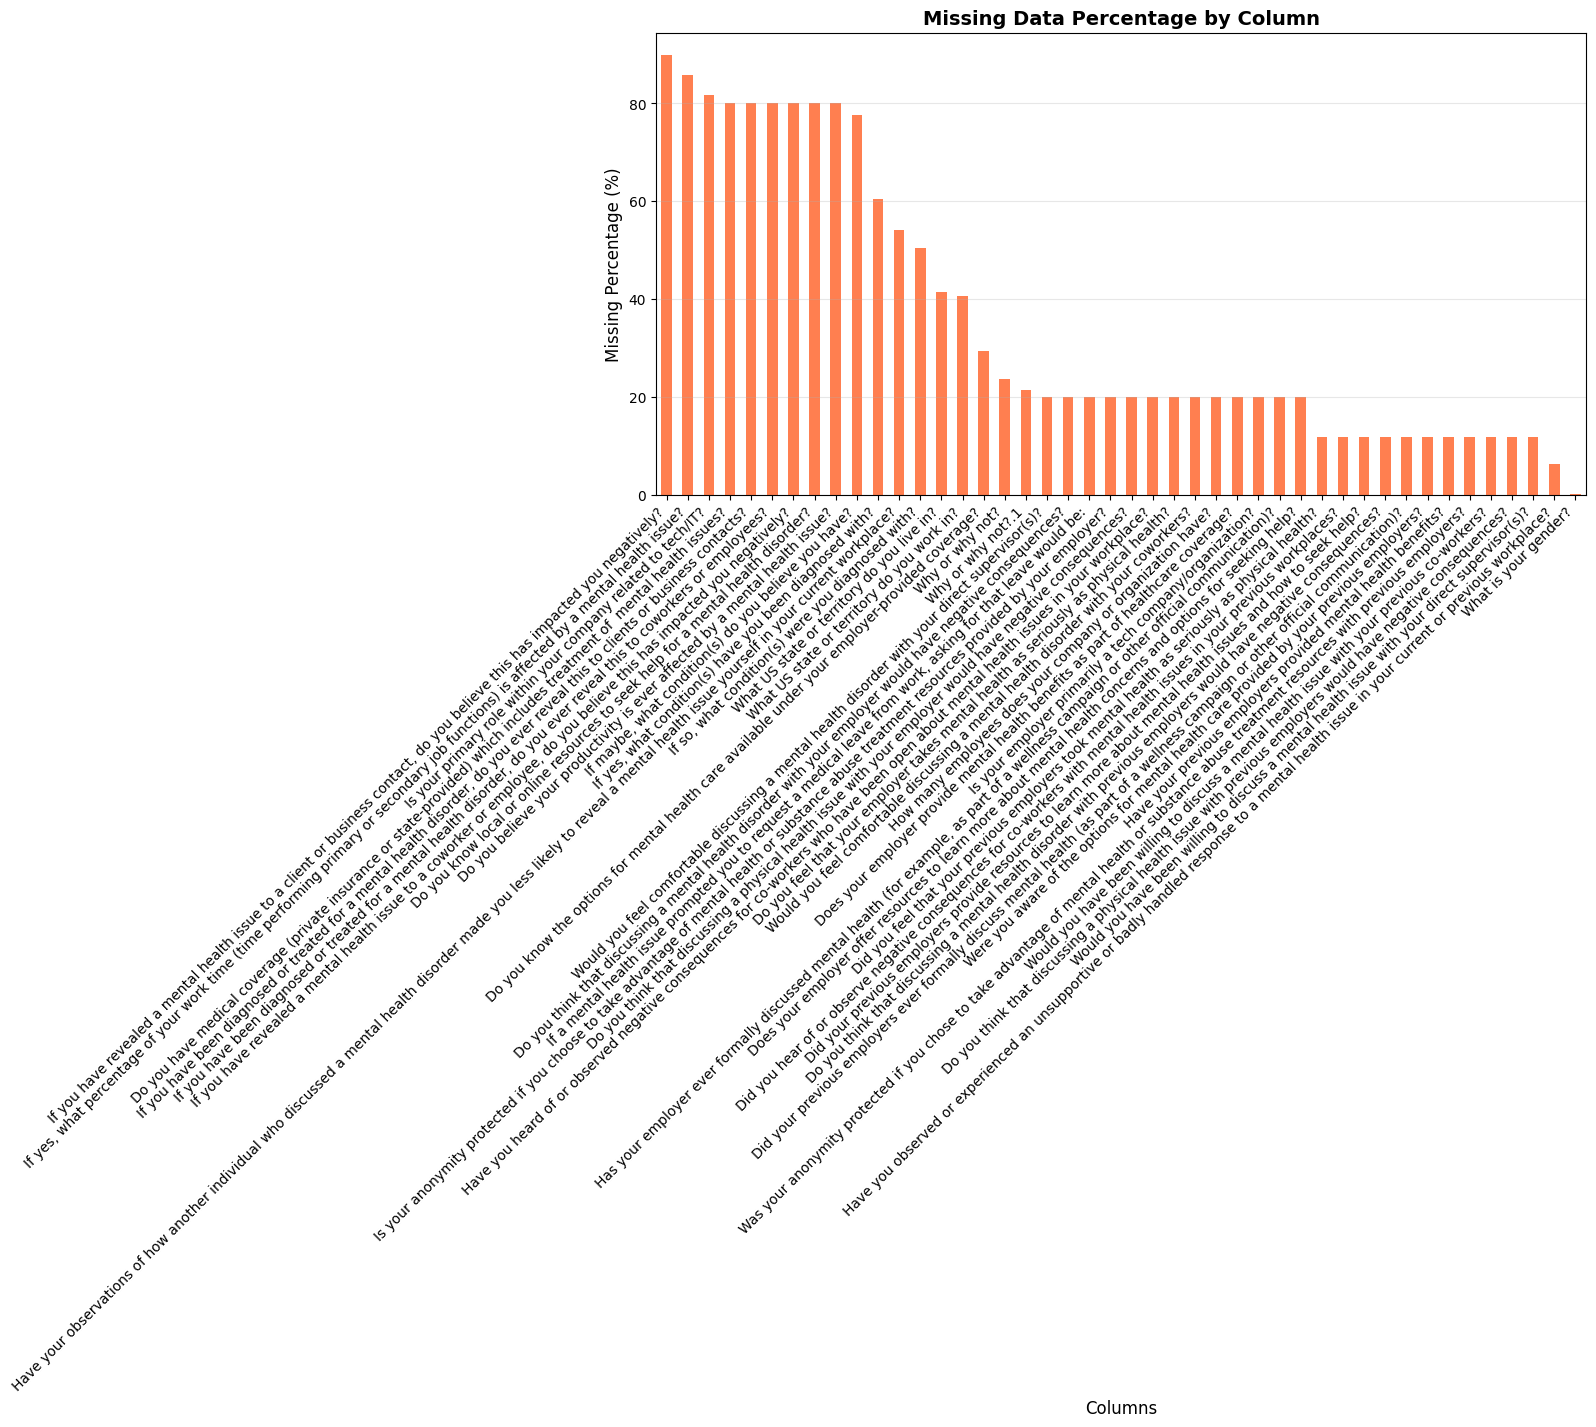

In [9]:
# Step 3: Visualize Missing Data Patterns
print("\n" + "=" * 80)
print("STEP 3: VISUALIZE MISSING DATA PATTERNS")
print("=" * 80)

# Create a copy for visualization
data_copy = data.copy()

# Calculate missing percentage per column
missing_pct = (data_copy.isnull().sum() / len(data_copy) * 100).sort_values(ascending=False)
missing_cols = missing_pct[missing_pct > 0]

if len(missing_cols) > 0:
    plt.figure(figsize=(12, 6))
    missing_cols.plot(kind='bar', color='coral')
    plt.title('Missing Data Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

In [10]:
# Step 4: Column Classification and Analysis
print("\n" + "=" * 80)
print("STEP 4: COLUMN CLASSIFICATION")
print("=" * 80)

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric Columns ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    unique_count = data[col].nunique()
    print(f"{i}. {col}: {unique_count} unique values")
    
print(f"\nTotal Columns: {len(data.columns)}")


STEP 4: COLUMN CLASSIFICATION

Numeric Columns (7):
['Are you self-employed?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?', 'Do you have previous employers?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'What is your age?']

Categorical Columns (56):
1. How many employees does your company or organization have?: 6 unique values
2. Does your employer provide mental health benefits as part of healthcare coverage?: 4 unique values
3. Do you know the options for mental health care available under your employer-provided coverage?: 3 unique values
4. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: 3 unique values
5. Does your employer offer resources to le

In [11]:
# Step 5: Statistical Summary
print("\n" + "=" * 80)
print("STEP 5: STATISTICAL SUMMARY")
print("=" * 80)

if len(numeric_cols) > 0:
    print("\nNumeric Columns Statistics:")
    print(data[numeric_cols].describe().T)
else:
    print("\nNo numeric columns found.")

print("\nCategorical Columns - Value Counts (First 5 columns):")
for col in categorical_cols[:5]:
    print(f"\n{col}:")
    print(data[col].value_counts().head())


STEP 5: STATISTICAL SUMMARY

Numeric Columns Statistics:
                                                     count       mean  \
Are you self-employed?                              1433.0   0.200279   
Is your employer primarily a tech company/organ...  1146.0   0.770506   
Is your primary role within your company relate...   263.0   0.942966   
Do you have medical coverage (private insurance...   287.0   0.644599   
Do you have previous employers?                     1433.0   0.882066   
Have you ever sought treatment for a mental hea...  1433.0   0.585485   
What is your age?                                   1433.0  34.286113   

                                                          std  min   25%  \
Are you self-employed?                               0.400349  0.0   0.0   
Is your employer primarily a tech company/organ...   0.420691  0.0   1.0   
Is your primary role within your company relate...   0.232350  0.0   1.0   
Do you have medical coverage (private insurance...   

## Exploratory Data Analysis (EDA)

Let's perform intensive analysis to understand the data patterns, distributions, and relationships:

EDA STEP 1: AGE DISTRIBUTION ANALYSIS

Age Statistics:
Mean: 34.29
Median: 33.00
Mode: 30
Std Dev: 11.29
Min: 3
Max: 323


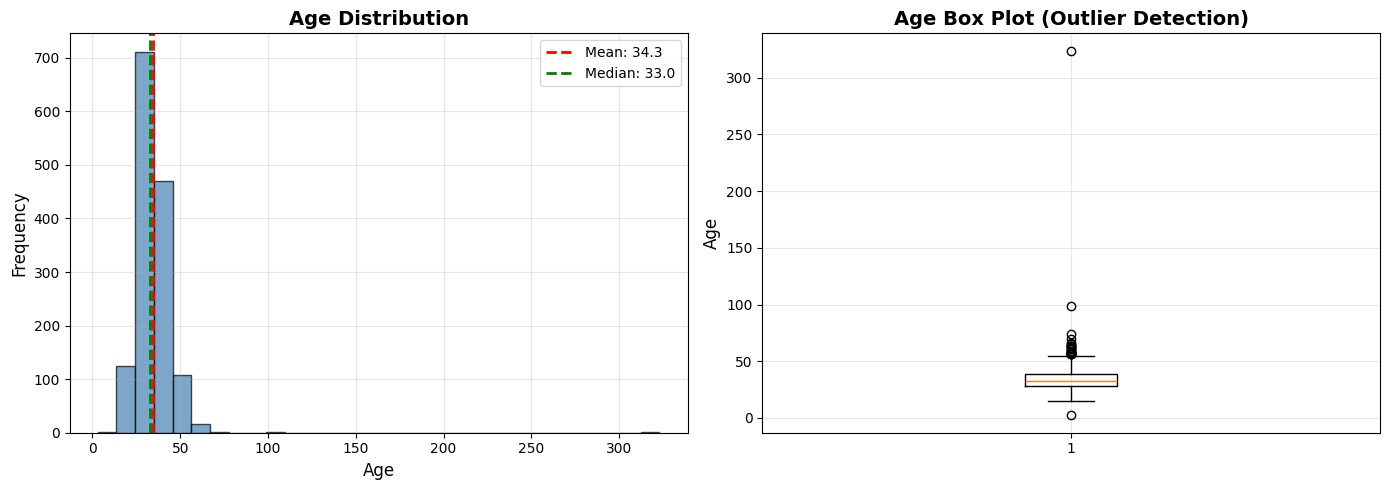


Age Group Distribution:
Age_Group
18-25    170
26-35    740
36-45    395
46-55    103
55+       24
Name: count, dtype: int64


In [12]:
# EDA Step 1: Analyze Age Distribution
print("=" * 80)
print("EDA STEP 1: AGE DISTRIBUTION ANALYSIS")
print("=" * 80)

if 'What is your age?' in data.columns:
    age_col = 'What is your age?'
    
    # Basic statistics
    print(f"\nAge Statistics:")
    print(f"Mean: {data[age_col].mean():.2f}")
    print(f"Median: {data[age_col].median():.2f}")
    print(f"Mode: {data[age_col].mode().values[0]}")
    print(f"Std Dev: {data[age_col].std():.2f}")
    print(f"Min: {data[age_col].min()}")
    print(f"Max: {data[age_col].max()}")
    
    # Age distribution
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(data[age_col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    plt.axvline(data[age_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[age_col].mean():.1f}')
    plt.axvline(data[age_col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data[age_col].median():.1f}')
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Age Distribution', fontweight='bold', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(data[age_col].dropna(), vert=True)
    plt.ylabel('Age', fontsize=12)
    plt.title('Age Box Plot (Outlier Detection)', fontweight='bold', fontsize=14)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Age groups
    age_bins = [0, 25, 35, 45, 55, 100]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
    data['Age_Group'] = pd.cut(data[age_col], bins=age_bins, labels=age_labels, include_lowest=True)
    
    print(f"\nAge Group Distribution:")
    print(data['Age_Group'].value_counts().sort_index())
else:
    print("\nAge column not found in dataset")


EDA STEP 2: GENDER DISTRIBUTION ANALYSIS

Gender Distribution:
What is your gender?
Male                                       610
male                                       249
Female                                     153
female                                      95
M                                           86
                                          ... 
female-bodied; no feelings about gender      1
cis man                                      1
AFAB                                         1
Transgender woman                            1
MALE                                         1
Name: count, Length: 70, dtype: int64


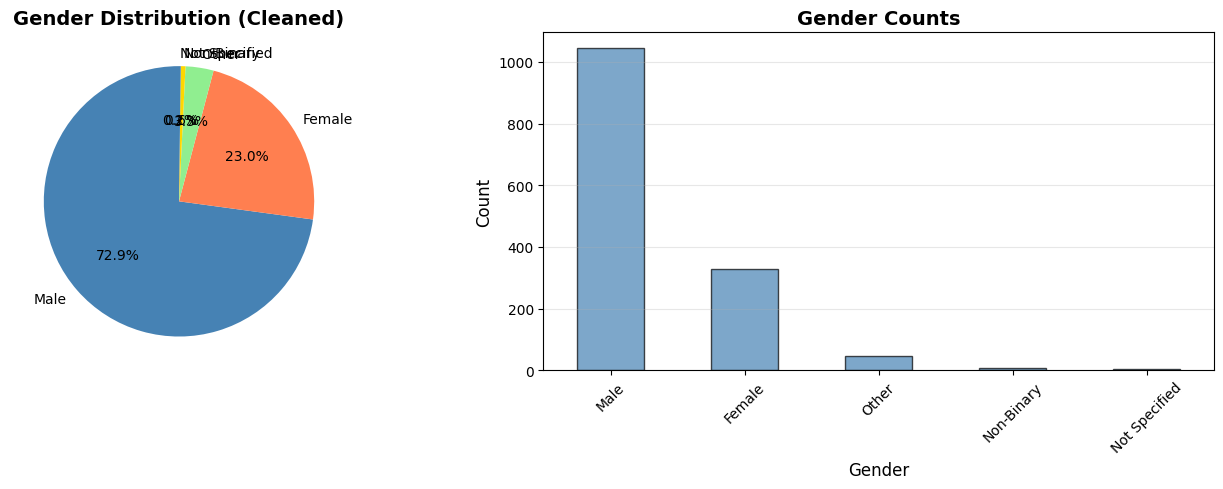


Cleaned Gender Distribution:
Gender_Clean
Male             1044
Female            330
Other              48
Non-Binary          8
Not Specified       3
Name: count, dtype: int64


In [13]:
# EDA Step 2: Gender Distribution Analysis
print("\n" + "=" * 80)
print("EDA STEP 2: GENDER DISTRIBUTION ANALYSIS")
print("=" * 80)

if 'What is your gender?' in data.columns:
    gender_col = 'What is your gender?'
    
    # Count values
    gender_counts = data[gender_col].value_counts()
    print(f"\nGender Distribution:")
    print(gender_counts)
    
    # Clean gender data (consolidate similar values)
    def standardize_gender(value):
        if pd.isna(value):
            return 'Not Specified'
        value = str(value).lower().strip()
        if value in ['male', 'm', 'man', 'male ', 'male.']:
            return 'Male'
        elif value in ['female', 'f', 'woman', 'female ', 'i identify as female.']:
            return 'Female'
        elif 'non' in value or 'binary' in value or 'bigender' in value:
            return 'Non-Binary'
        else:
            return 'Other'
    
    data['Gender_Clean'] = data[gender_col].apply(standardize_gender)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart
    gender_clean_counts = data['Gender_Clean'].value_counts()
    axes[0].pie(gender_clean_counts.values, labels=gender_clean_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['steelblue', 'coral', 'lightgreen', 'gold'])
    axes[0].set_title('Gender Distribution (Cleaned)', fontweight='bold', fontsize=14)
    
    # Bar chart
    gender_clean_counts.plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Gender', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_title('Gender Counts', fontweight='bold', fontsize=14)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nCleaned Gender Distribution:")
    print(data['Gender_Clean'].value_counts())
else:
    print("\nGender column not found")


EDA STEP 3: WORK ENVIRONMENT ANALYSIS

Company Size Distribution:
How many employees does your company or organization have?
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64


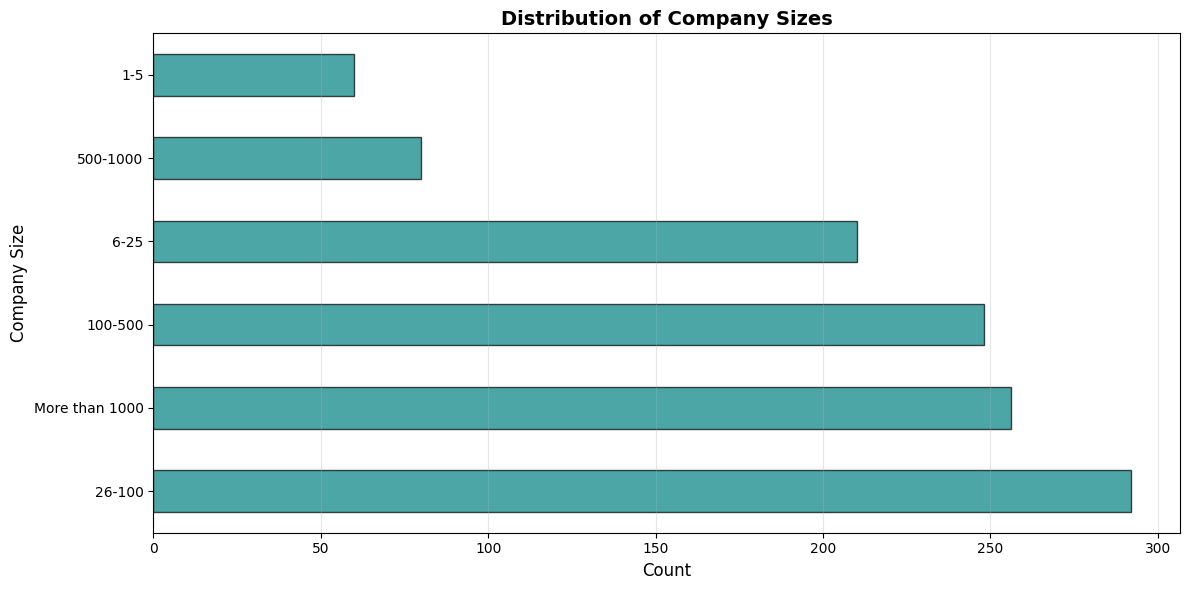



Remote Work Distribution:
Do you work remotely?
Sometimes    757
Always       343
Never        333
Name: count, dtype: int64


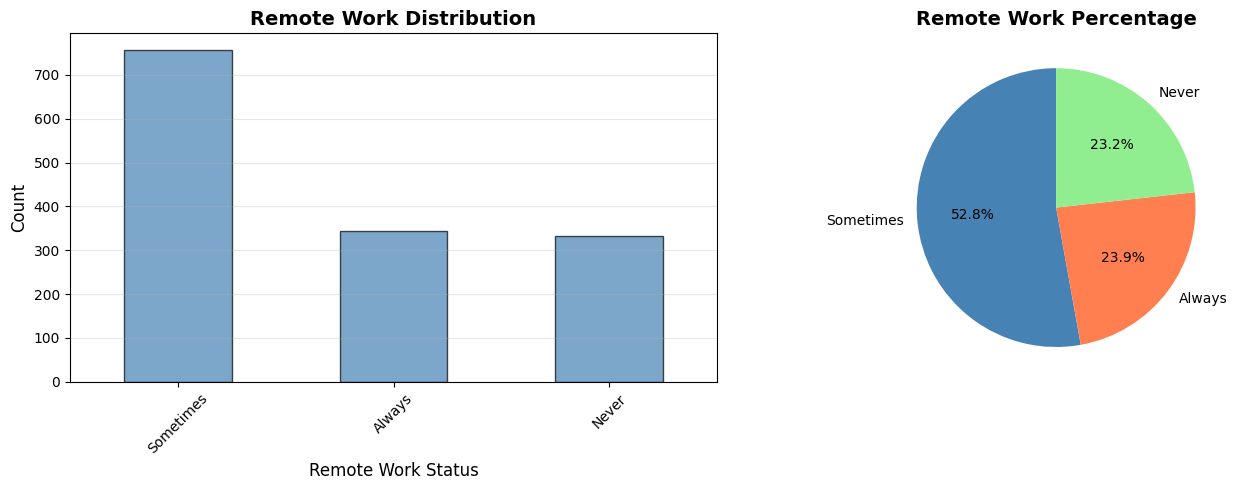



Tech Company Distribution:
Is your employer primarily a tech company/organization?
1.0    883
0.0    263
Name: count, dtype: int64


In [14]:
# EDA Step 3: Work Environment Analysis
print("\n" + "=" * 80)
print("EDA STEP 3: WORK ENVIRONMENT ANALYSIS")
print("=" * 80)

# Company size analysis
if 'How many employees does your company or organization have?' in data.columns:
    company_size_col = 'How many employees does your company or organization have?'
    
    print("\nCompany Size Distribution:")
    company_size_counts = data[company_size_col].value_counts()
    print(company_size_counts)
    
    plt.figure(figsize=(12, 6))
    company_size_counts.plot(kind='barh', color='teal', edgecolor='black', alpha=0.7)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Company Size', fontsize=12)
    plt.title('Distribution of Company Sizes', fontweight='bold', fontsize=14)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Remote work analysis
if 'Do you work remotely?' in data.columns:
    remote_col = 'Do you work remotely?'
    
    print("\n\nRemote Work Distribution:")
    remote_counts = data[remote_col].value_counts()
    print(remote_counts)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    remote_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Remote Work Status', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title('Remote Work Distribution', fontweight='bold', fontsize=14)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    axes[1].pie(remote_counts.values, labels=remote_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['steelblue', 'coral', 'lightgreen'])
    axes[1].set_title('Remote Work Percentage', fontweight='bold', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Tech company analysis
if 'Is your employer primarily a tech company/organization?' in data.columns:
    tech_col = 'Is your employer primarily a tech company/organization?'
    
    print("\n\nTech Company Distribution:")
    print(data[tech_col].value_counts())


EDA STEP 4: MENTAL HEALTH BENEFITS ANALYSIS


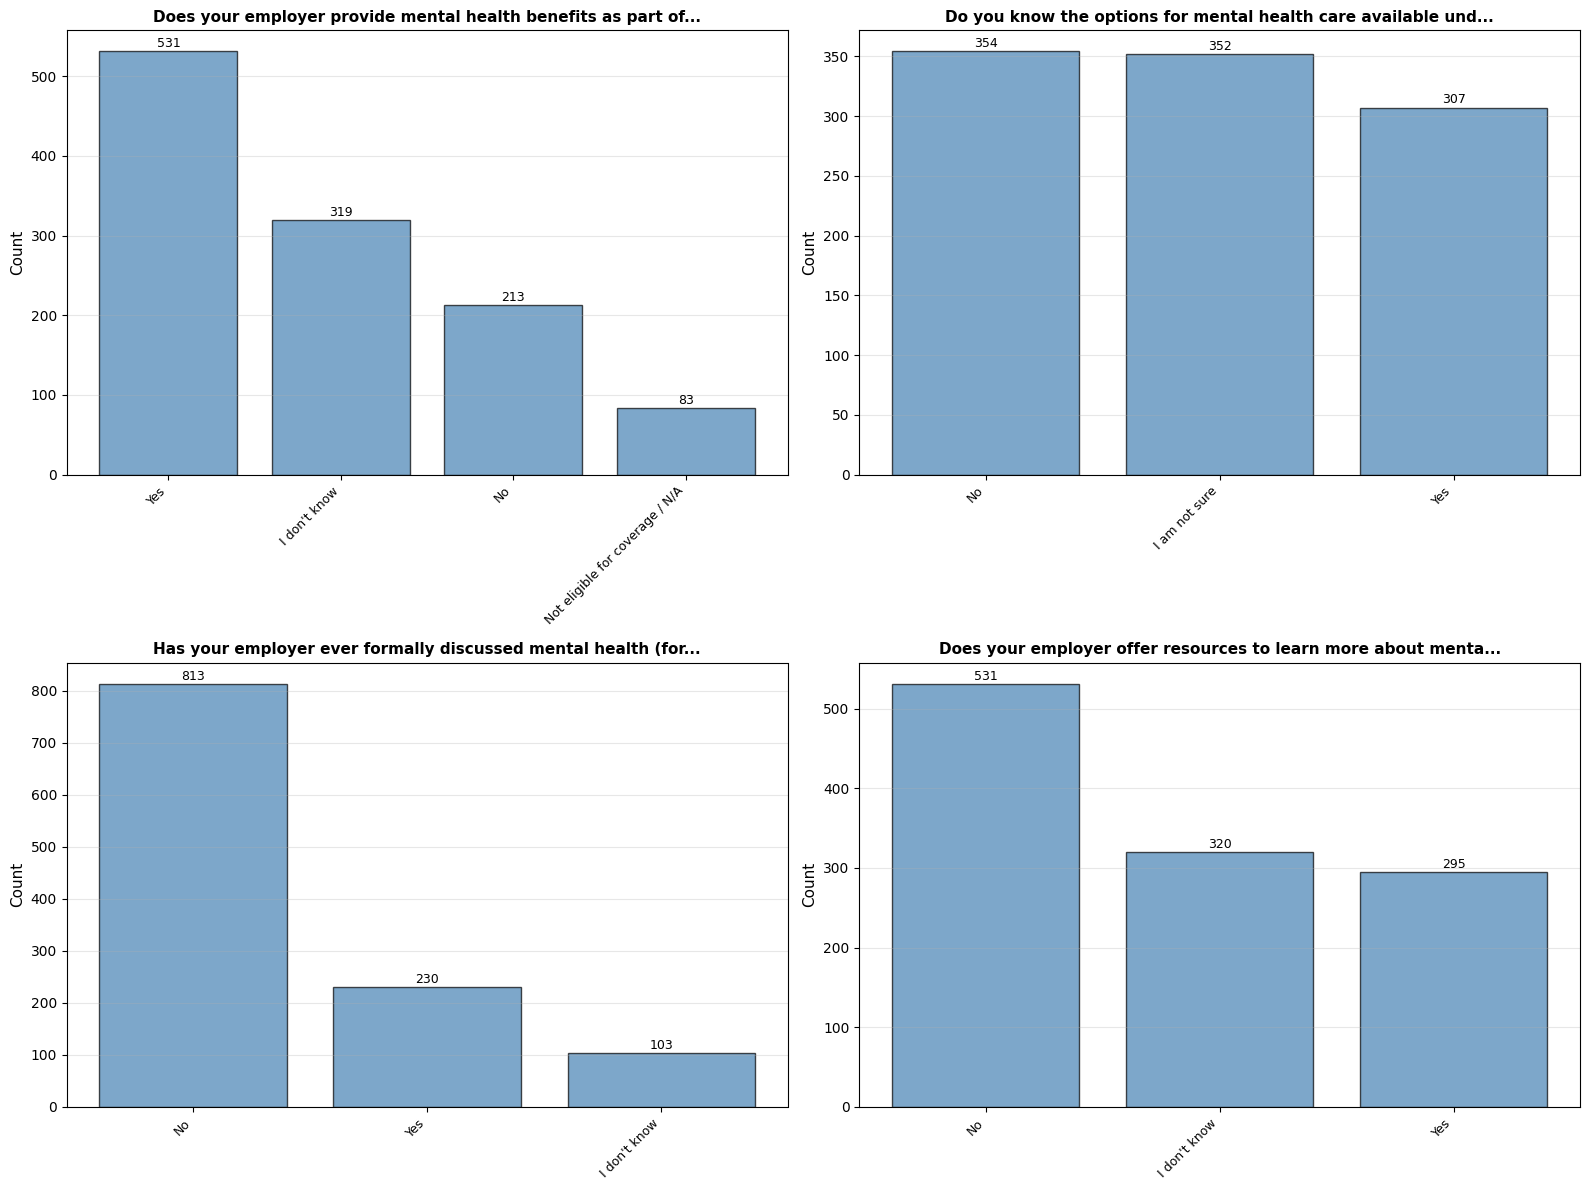


Mental Health Benefits Summary:

Does your employer provide mental health benefits as part of healthcare coverage?:
Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64

Do you know the options for mental health care available under your employer-provided coverage?:
Do you know the options for mental health care available under your employer-provided coverage?
No               354
I am not sure    352
Yes              307
Name: count, dtype: int64

Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              813
Yes             230
I don't know    103
Name

In [15]:
# EDA Step 4: Mental Health Benefits Analysis
print("\n" + "=" * 80)
print("EDA STEP 4: MENTAL HEALTH BENEFITS ANALYSIS")
print("=" * 80)

mental_health_cols = [
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Do you know the options for mental health care available under your employer-provided coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
]

available_cols = [col for col in mental_health_cols if col in data.columns]

if len(available_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(available_cols[:4]):
        counts = data[col].value_counts()
        
        # Create bar plot
        axes[idx].bar(range(len(counts)), counts.values, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_xticks(range(len(counts)))
        axes[idx].set_xticklabels(counts.index, rotation=45, ha='right', fontsize=9)
        axes[idx].set_ylabel('Count', fontsize=11)
        axes[idx].set_title(col[:60] + '...', fontweight='bold', fontsize=11)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(counts.values):
            axes[idx].text(i, v + max(counts.values)*0.01, str(v), ha='center', fontsize=9)
    
    # Hide unused subplots
    for idx in range(len(available_cols), 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\nMental Health Benefits Summary:")
    for col in available_cols:
        print(f"\n{col}:")
        print(data[col].value_counts())
else:
    print("\nMental health benefit columns not found")


EDA STEP 5: MENTAL HEALTH CONDITION ANALYSIS

Current Mental Health Disorder Status:
Do you currently have a mental health disorder?
Yes      575
No       531
Maybe    327
Name: count, dtype: int64


Crosstab: Past vs Current Mental Health:
Do you currently have a mental health disorder?     Maybe   No  Yes   All
Have you had a mental health disorder in the past?                       
Maybe                                                 155   65   26   246
No                                                     50  371   30   451
Yes                                                   122   95  519   736
All                                                   327  531  575  1433


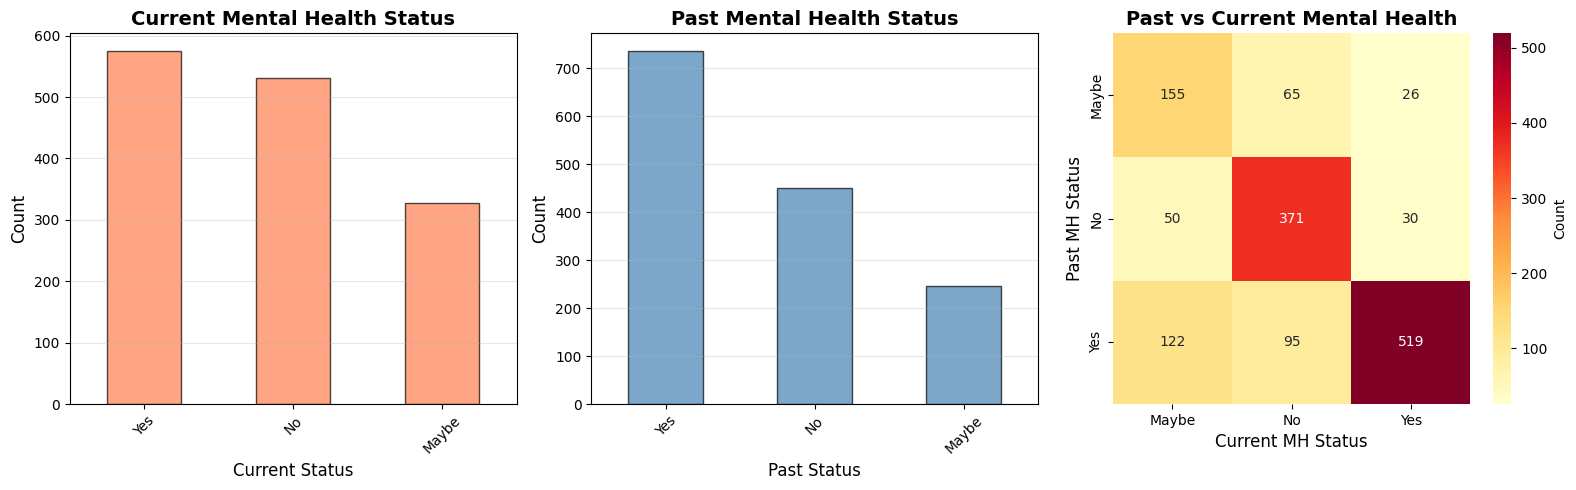



Treatment Seeking Behavior:
Have you ever sought treatment for a mental health issue from a mental health professional?
1    839
0    594
Name: count, dtype: int64


In [16]:
# EDA Step 5: Mental Health Condition Analysis
print("\n" + "=" * 80)
print("EDA STEP 5: MENTAL HEALTH CONDITION ANALYSIS")
print("=" * 80)

# Current mental health status
if 'Do you currently have a mental health disorder?' in data.columns:
    current_mh_col = 'Do you currently have a mental health disorder?'
    
    print("\nCurrent Mental Health Disorder Status:")
    current_mh_counts = data[current_mh_col].value_counts()
    print(current_mh_counts)
    
    # Past mental health
    if 'Have you had a mental health disorder in the past?' in data.columns:
        past_mh_col = 'Have you had a mental health disorder in the past?'
        
        # Create crosstab
        crosstab = pd.crosstab(data[past_mh_col], data[current_mh_col], margins=True)
        print("\n\nCrosstab: Past vs Current Mental Health:")
        print(crosstab)
        
        # Visualize
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))
        
        # Current status
        current_mh_counts.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel('Current Status', fontsize=12)
        axes[0].set_ylabel('Count', fontsize=12)
        axes[0].set_title('Current Mental Health Status', fontweight='bold', fontsize=14)
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', alpha=0.3)
        
        # Past status
        past_mh_counts = data[past_mh_col].value_counts()
        past_mh_counts.plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('Past Status', fontsize=12)
        axes[1].set_ylabel('Count', fontsize=12)
        axes[1].set_title('Past Mental Health Status', fontweight='bold', fontsize=14)
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(axis='y', alpha=0.3)
        
        # Heatmap
        crosstab_no_margins = pd.crosstab(data[past_mh_col], data[current_mh_col])
        sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd', ax=axes[2], cbar_kws={'label': 'Count'})
        axes[2].set_xlabel('Current MH Status', fontsize=12)
        axes[2].set_ylabel('Past MH Status', fontsize=12)
        axes[2].set_title('Past vs Current Mental Health', fontweight='bold', fontsize=14)
        
        plt.tight_layout()
        plt.show()

# Treatment seeking
if 'Have you ever sought treatment for a mental health issue from a mental health professional?' in data.columns:
    treatment_col = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
    
    print("\n\nTreatment Seeking Behavior:")
    print(data[treatment_col].value_counts())


EDA STEP 6: WORK PRODUCTIVITY IMPACT ANALYSIS

Productivity Affected by Mental Health:
Do you believe your productivity is ever affected by a mental health issue?
Yes                     204
Unsure                   38
Not applicable to me     31
No                       14
Name: count, dtype: int64


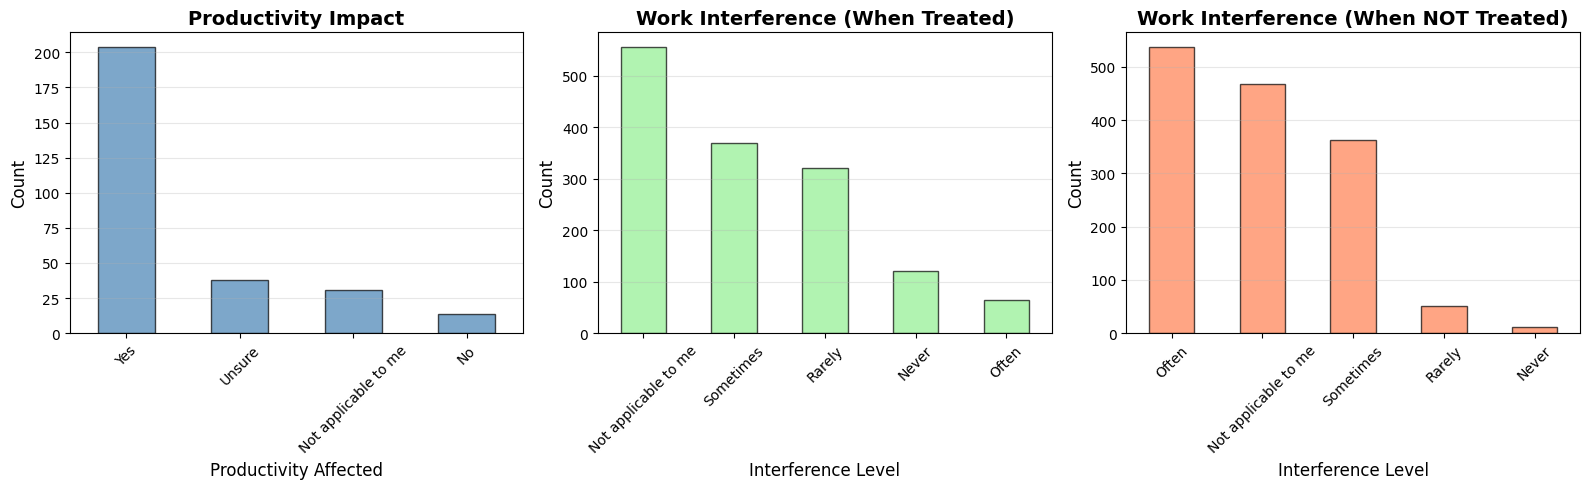


If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?:
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
Not applicable to me    557
Sometimes               369
Rarely                  322
Never                   120
Often                    65
Name: count, dtype: int64

If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?:
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
Often                   538
Not applicable to me    468
Sometimes               363
Rarely                   52
Never                    12
Name: count, dtype: int64


In [17]:
# EDA Step 6: Work Productivity Impact Analysis
print("\n" + "=" * 80)
print("EDA STEP 6: WORK PRODUCTIVITY IMPACT ANALYSIS")
print("=" * 80)

# Productivity affected
if 'Do you believe your productivity is ever affected by a mental health issue?' in data.columns:
    productivity_col = 'Do you believe your productivity is ever affected by a mental health issue?'
    
    print("\nProductivity Affected by Mental Health:")
    prod_counts = data[productivity_col].value_counts()
    print(prod_counts)
    
    # Work interference analysis
    interference_cols = [
        'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
        'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
    ]
    
    available_interference = [col for col in interference_cols if col in data.columns]
    
    if len(available_interference) > 0:
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))
        
        # Productivity bar chart
        prod_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel('Productivity Affected', fontsize=12)
        axes[0].set_ylabel('Count', fontsize=12)
        axes[0].set_title('Productivity Impact', fontweight='bold', fontsize=14)
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', alpha=0.3)
        
        # Interference when treated
        if len(available_interference) > 0:
            treated_counts = data[available_interference[0]].value_counts()
            treated_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black', alpha=0.7)
            axes[1].set_xlabel('Interference Level', fontsize=12)
            axes[1].set_ylabel('Count', fontsize=12)
            axes[1].set_title('Work Interference (When Treated)', fontweight='bold', fontsize=14)
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].grid(axis='y', alpha=0.3)
        
        # Interference when NOT treated
        if len(available_interference) > 1:
            untreated_counts = data[available_interference[1]].value_counts()
            untreated_counts.plot(kind='bar', ax=axes[2], color='coral', edgecolor='black', alpha=0.7)
            axes[2].set_xlabel('Interference Level', fontsize=12)
            axes[2].set_ylabel('Count', fontsize=12)
            axes[2].set_title('Work Interference (When NOT Treated)', fontweight='bold', fontsize=14)
            axes[2].tick_params(axis='x', rotation=45)
            axes[2].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        for col in available_interference:
            print(f"\n{col}:")
            print(data[col].value_counts())


EDA STEP 7: STIGMA & COMFORT LEVEL ANALYSIS

Stigma & Comfort Summary:
                                                    Do you think that discussing a mental he...  \
Do you think that discussing a mental health di...                                                
Maybe                                                                                       487   
No                                                                                          438   
Yes                                                                                         221   

                                                    Would you feel comfortable discussing a ...  \
Do you think that discussing a mental health di...                                                
Maybe                                                                                       382   
No                                                                                          336   
Yes                                 

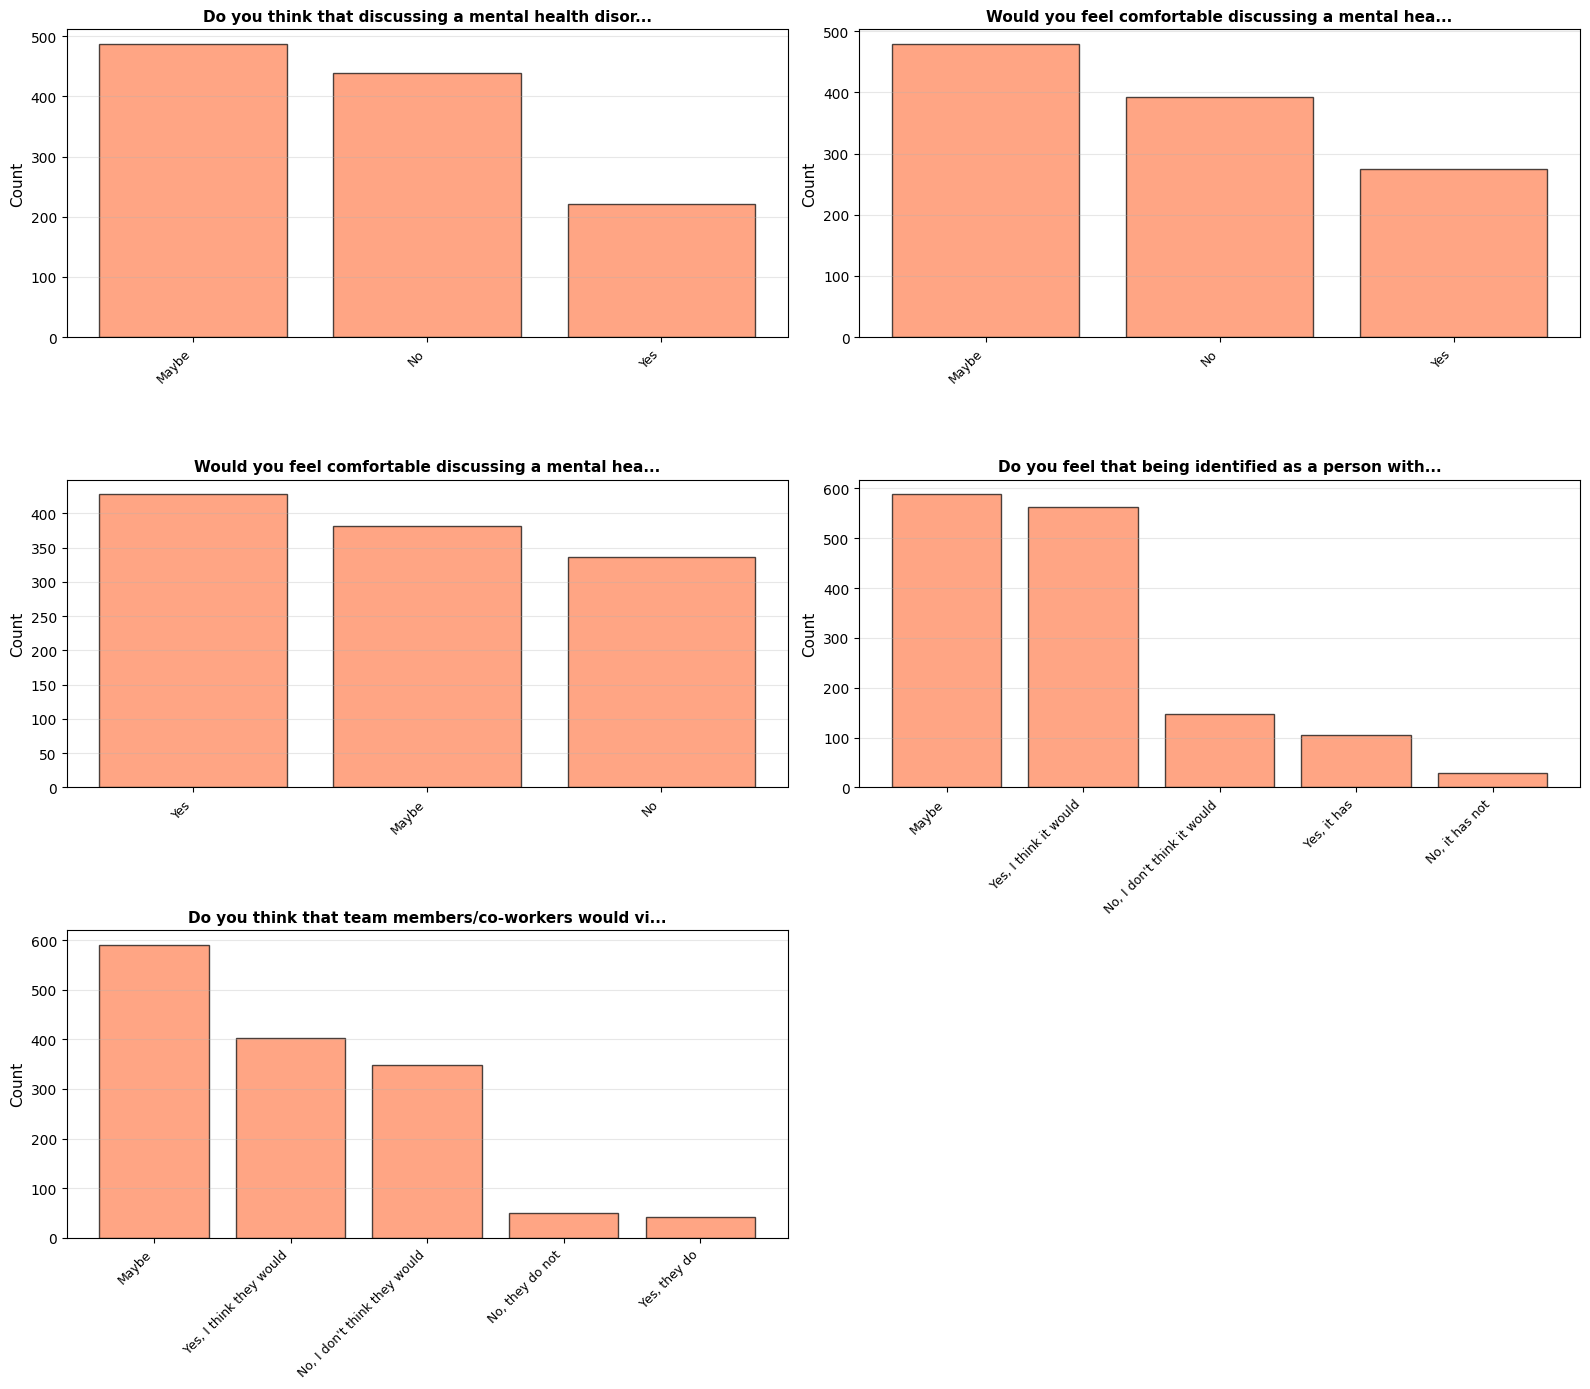



Stigma Analysis:
Do you think that discussing a mental health disorder with y...: 19.3% perceived negative impact
Would you feel comfortable discussing a mental health disord...: 24.0% perceived negative impact
Would you feel comfortable discussing a mental health disord...: 37.3% perceived negative impact


In [18]:
# EDA Step 7: Stigma and Comfort Level Analysis
print("\n" + "=" * 80)
print("EDA STEP 7: STIGMA & COMFORT LEVEL ANALYSIS")
print("=" * 80)

stigma_cols = [
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'
]

available_stigma = [col for col in stigma_cols if col in data.columns]

if len(available_stigma) > 0:
    # Create summary dataframe
    stigma_summary = pd.DataFrame()
    
    for col in available_stigma[:5]:
        counts = data[col].value_counts()
        col_name = col[:40] + '...'
        stigma_summary[col_name] = counts
    
    print("\nStigma & Comfort Summary:")
    print(stigma_summary.fillna(0).astype(int))
    
    # Visualize
    fig, axes = plt.subplots(3, 2, figsize=(16, 14))
    axes = axes.ravel()
    
    for idx, col in enumerate(available_stigma[:5]):
        counts = data[col].value_counts()
        
        axes[idx].bar(range(len(counts)), counts.values, color='coral', edgecolor='black', alpha=0.7)
        axes[idx].set_xticks(range(len(counts)))
        axes[idx].set_xticklabels(counts.index, rotation=45, ha='right', fontsize=9)
        axes[idx].set_ylabel('Count', fontsize=11)
        axes[idx].set_title(col[:50] + '...', fontweight='bold', fontsize=11)
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide unused subplot
    axes[5].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate stigma score (percentage of negative responses)
    print("\n\nStigma Analysis:")
    for col in available_stigma[:3]:
        yes_count = data[col].str.contains('Yes', case=False, na=False).sum()
        total_count = data[col].notna().sum()
        if total_count > 0:
            pct = (yes_count / total_count) * 100
            print(f"{col[:60]}...: {pct:.1f}% perceived negative impact")


EDA STEP 8: GEOGRAPHIC DISTRIBUTION ANALYSIS

Top 15 Countries by Respondent Count:
What country do you live in?
United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
Russia                        9
India                         9
New Zealand                   9
Bulgaria                      7
Name: count, dtype: int64


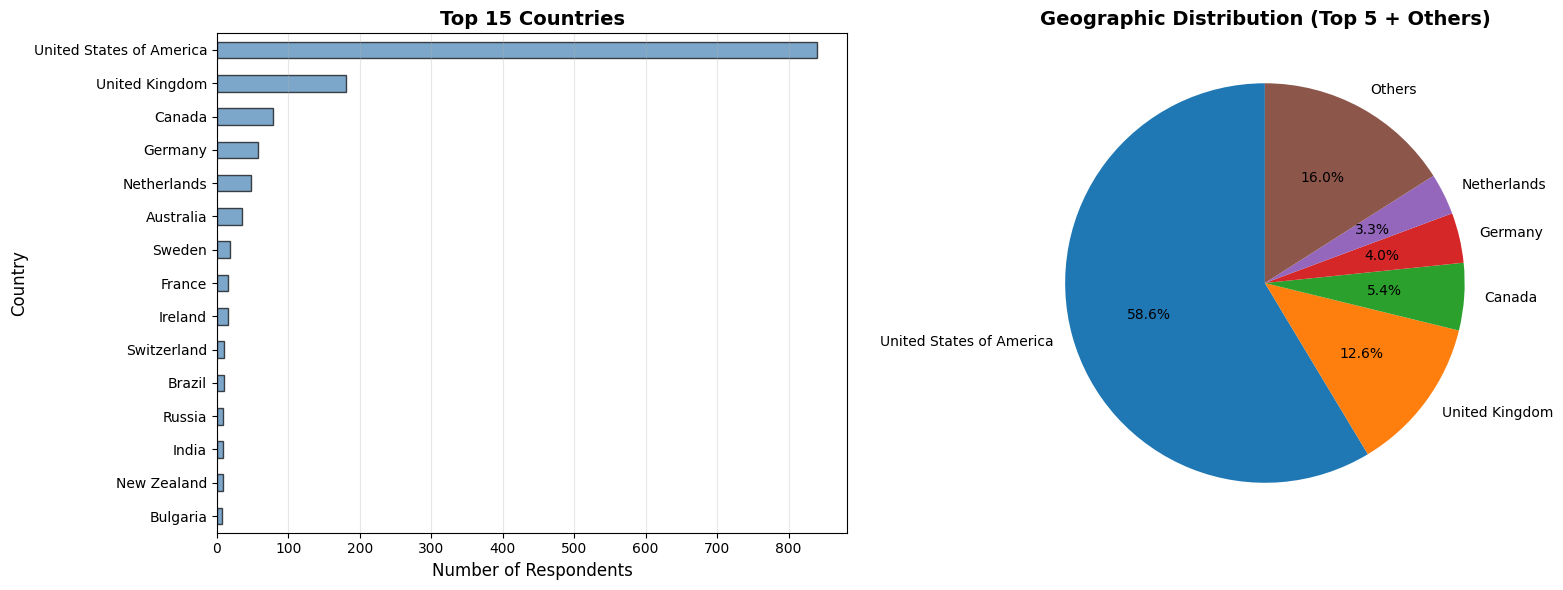



US States Distribution (Total: 840 respondents):
What US state or territory do you live in?
California      130
Illinois         56
Michigan         48
New York         45
Washington       43
Texas            43
Minnesota        42
Oregon           37
Pennsylvania     33
Colorado         28
Name: count, dtype: int64


In [19]:
# EDA Step 8: Geographic Analysis
print("\n" + "=" * 80)
print("EDA STEP 8: GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("=" * 80)

if 'What country do you live in?' in data.columns:
    country_col = 'What country do you live in?'
    
    # Top countries
    country_counts = data[country_col].value_counts().head(15)
    
    print("\nTop 15 Countries by Respondent Count:")
    print(country_counts)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    country_counts.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Number of Respondents', fontsize=12)
    axes[0].set_ylabel('Country', fontsize=12)
    axes[0].set_title('Top 15 Countries', fontweight='bold', fontsize=14)
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    # Pie chart for top 5
    top5 = data[country_col].value_counts().head(5)
    others_count = data[country_col].value_counts()[5:].sum()
    pie_data = pd.concat([top5, pd.Series({'Others': others_count})])
    
    axes[1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Geographic Distribution (Top 5 + Others)', fontweight='bold', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # US state analysis if available
    if 'What US state or territory do you live in?' in data.columns:
        us_state_col = 'What US state or territory do you live in?'
        us_states = data[us_state_col].dropna()
        
        if len(us_states) > 0:
            print(f"\n\nUS States Distribution (Total: {len(us_states)} respondents):")
            state_counts = us_states.value_counts().head(10)
            print(state_counts)
else:
    print("\nCountry column not found")


EDA STEP 9: BIVARIATE ANALYSIS - KEY RELATIONSHIPS

Age vs Mental Health Status:


C:\Users\hp\AppData\Local\Temp\ipykernel_11820\475733685.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(age_by_mh, labels=mh_categories)


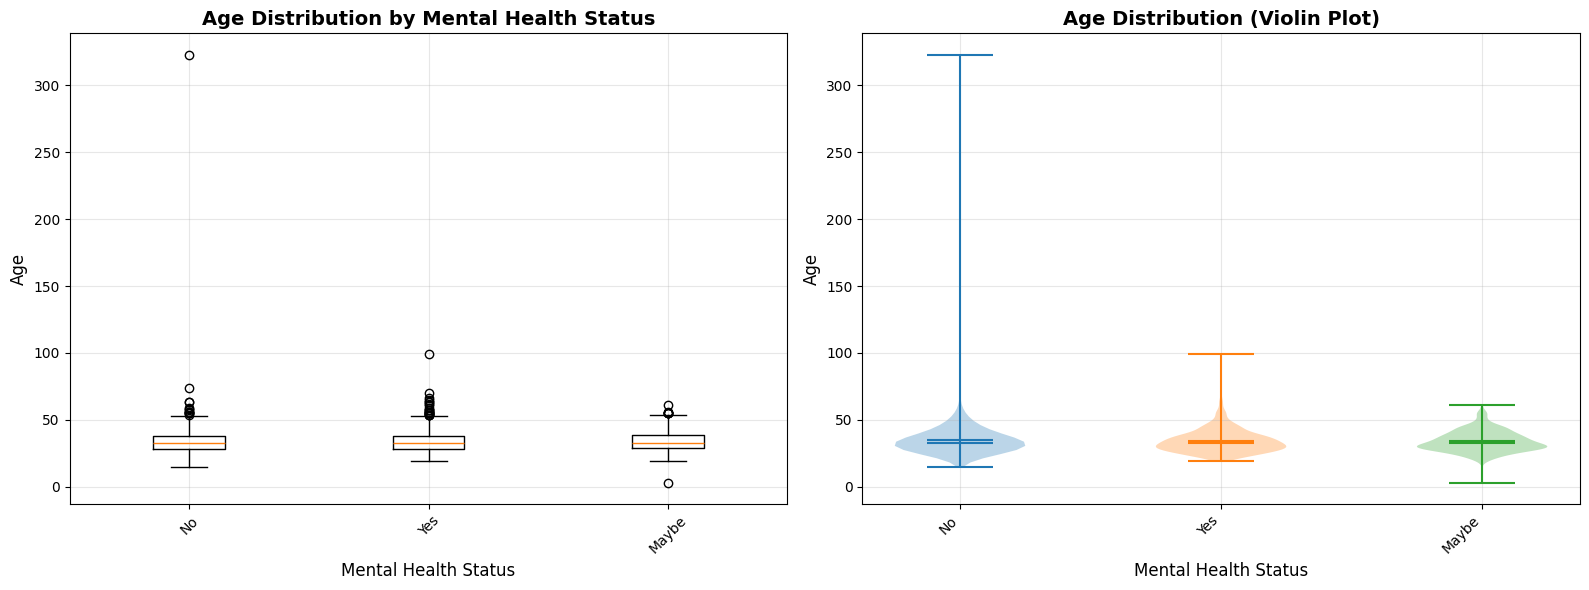


No: Mean age = 34.6, Median = 33.0, Std = 14.9

Yes: Mean age = 34.2, Median = 33.0, Std = 8.8

Maybe: Mean age = 33.9, Median = 33.0, Std = 7.8


Gender vs Mental Health Status:
Do you currently have a mental health disorder?  Maybe     No     Yes
Gender_Clean                                                         
Female                                           16.97  29.39   53.64
Male                                             24.81  40.61   34.58
Non-Binary                                       12.50   0.00   87.50
Not Specified                                     0.00   0.00  100.00
Other                                            22.92  20.83   56.25


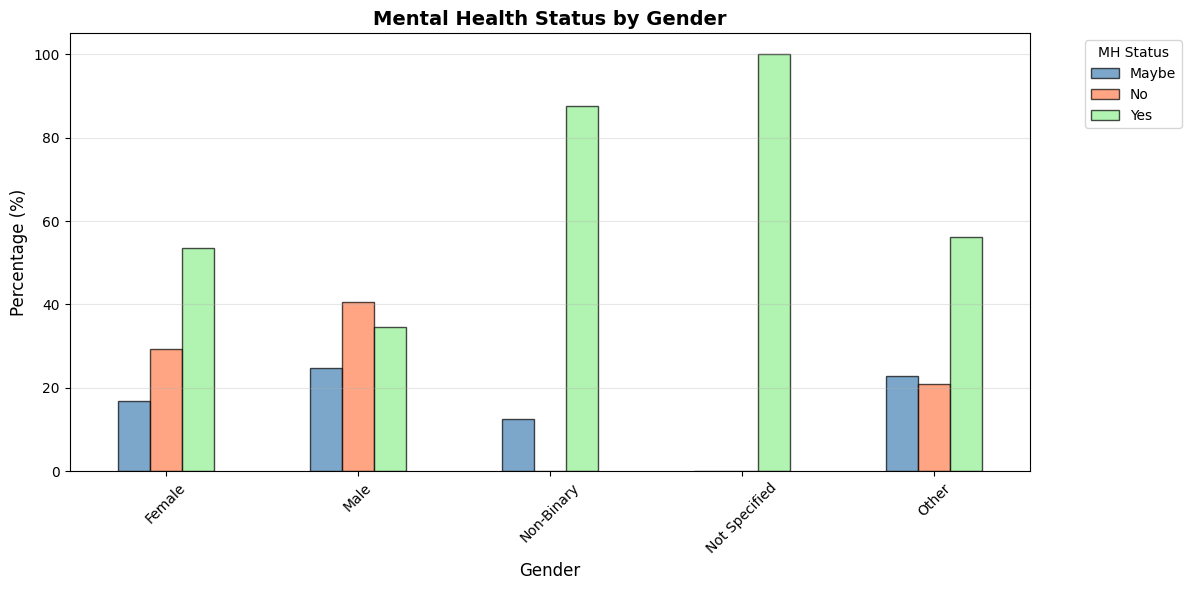

In [20]:
# EDA Step 9: Bivariate Analysis - Key Relationships
print("\n" + "=" * 80)
print("EDA STEP 9: BIVARIATE ANALYSIS - KEY RELATIONSHIPS")
print("=" * 80)

# Age vs Mental Health Status
if 'What is your age?' in data.columns and 'Do you currently have a mental health disorder?' in data.columns:
    age_col = 'What is your age?'
    mh_col = 'Do you currently have a mental health disorder?'
    
    print("\nAge vs Mental Health Status:")
    
    # Filter valid data
    valid_data = data[[age_col, mh_col]].dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    mh_categories = valid_data[mh_col].unique()
    age_by_mh = [valid_data[valid_data[mh_col] == cat][age_col].values for cat in mh_categories]
    
    axes[0].boxplot(age_by_mh, labels=mh_categories)
    axes[0].set_xlabel('Mental Health Status', fontsize=12)
    axes[0].set_ylabel('Age', fontsize=12)
    axes[0].set_title('Age Distribution by Mental Health Status', fontweight='bold', fontsize=14)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(alpha=0.3)
    
    # Violin plot
    for i, cat in enumerate(mh_categories):
        data_subset = valid_data[valid_data[mh_col] == cat][age_col].values
        positions = [i + 1]
        parts = axes[1].violinplot([data_subset], positions=positions, showmeans=True, showmedians=True)
    
    axes[1].set_xticks(range(1, len(mh_categories) + 1))
    axes[1].set_xticklabels(mh_categories, rotation=45, ha='right')
    axes[1].set_xlabel('Mental Health Status', fontsize=12)
    axes[1].set_ylabel('Age', fontsize=12)
    axes[1].set_title('Age Distribution (Violin Plot)', fontweight='bold', fontsize=14)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    for cat in mh_categories:
        ages = valid_data[valid_data[mh_col] == cat][age_col]
        print(f"\n{cat}: Mean age = {ages.mean():.1f}, Median = {ages.median():.1f}, Std = {ages.std():.1f}")

# Gender vs Mental Health
if 'Gender_Clean' in data.columns and 'Do you currently have a mental health disorder?' in data.columns:
    print("\n\nGender vs Mental Health Status:")
    crosstab_gender_mh = pd.crosstab(data['Gender_Clean'], data[mh_col], normalize='index') * 100
    print(crosstab_gender_mh.round(2))
    
    # Visualize
    crosstab_gender_mh.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'coral', 'lightgreen'],
                            edgecolor='black', alpha=0.7)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Mental Health Status by Gender', fontweight='bold', fontsize=14)
    plt.legend(title='MH Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [21]:
# EDA Step 10: Key Insights Summary
print("\n" + "=" * 80)
print("EDA STEP 10: KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("=" * 80)

print("\nDEMOGRAPHIC INSIGHTS:")
if 'What is your age?' in data.columns:
    print(f"   • Age range: {data['What is your age?'].min():.0f} - {data['What is your age?'].max():.0f} years")
    print(f"   • Average age: {data['What is your age?'].mean():.1f} years")
    
if 'Gender_Clean' in data.columns:
    gender_dist = data['Gender_Clean'].value_counts()
    print(f"   • Gender: {gender_dist.index[0]} ({gender_dist.iloc[0]} respondents)")

if 'What country do you live in?' in data.columns:
    top_country = data['What country do you live in?'].value_counts().index[0]
    print(f"   • Most common country: {top_country}")

print("\nWORKPLACE INSIGHTS:")
if 'How many employees does your company or organization have?' in data.columns:
    top_size = data['How many employees does your company or organization have?'].mode().values[0]
    print(f"   • Most common company size: {top_size}")

if 'Do you work remotely?' in data.columns:
    remote_pct = (data['Do you work remotely?'].value_counts(normalize=True) * 100).to_dict()
    for key, val in list(remote_pct.items())[:2]:
        print(f"   • Remote work - {key}: {val:.1f}%")

print("\nMENTAL HEALTH INSIGHTS:")
if 'Do you currently have a mental health disorder?' in data.columns:
    mh_dist = data['Do you currently have a mental health disorder?'].value_counts()
    total = mh_dist.sum()
    for status, count in mh_dist.items():
        print(f"   • {status}: {count} ({count/total*100:.1f}%)")

if 'Have you ever sought treatment for a mental health issue from a mental health professional?' in data.columns:
    treatment_pct = (data['Have you ever sought treatment for a mental health issue from a mental health professional?'] == 1).mean() * 100
    print(f"   • Sought professional treatment: {treatment_pct:.1f}%")

if 'Do you believe your productivity is ever affected by a mental health issue?' in data.columns:
    prod_affected = data['Do you believe your productivity is ever affected by a mental health issue?'].value_counts()
    yes_pct = (prod_affected.get('Yes', 0) / prod_affected.sum()) * 100
    print(f"   • Report productivity impact: {yes_pct:.1f}%")

print("\nSTIGMA & COMFORT INSIGHTS:")
if 'Do you think that discussing a mental health disorder with your employer would have negative consequences?' in data.columns:
    neg_conseq = data['Do you think that discussing a mental health disorder with your employer would have negative consequences?']
    yes_pct = (neg_conseq.str.contains('Yes', case=False, na=False).sum() / neg_conseq.notna().sum()) * 100
    print(f"   • Fear negative consequences from employer: {yes_pct:.1f}%")

if 'Would you feel comfortable discussing a mental health disorder with your coworkers?' in data.columns:
    comfort_coworkers = data['Would you feel comfortable discussing a mental health disorder with your coworkers?']
    yes_pct = (comfort_coworkers.str.contains('Yes', case=False, na=False).sum() / comfort_coworkers.notna().sum()) * 100
    print(f"   • Comfortable discussing with coworkers: {yes_pct:.1f}%")

print("\nREADY FOR FEATURE ENGINEERING")
print("=" * 80)


EDA STEP 10: KEY INSIGHTS FROM EXPLORATORY ANALYSIS

DEMOGRAPHIC INSIGHTS:
   • Age range: 3 - 323 years
   • Average age: 34.3 years
   • Gender: Male (1044 respondents)
   • Most common country: United States of America

WORKPLACE INSIGHTS:
   • Most common company size: 26-100
   • Remote work - Sometimes: 52.8%
   • Remote work - Always: 23.9%

MENTAL HEALTH INSIGHTS:
   • Yes: 575 (40.1%)
   • No: 531 (37.1%)
   • Maybe: 327 (22.8%)
   • Sought professional treatment: 58.5%
   • Report productivity impact: 71.1%

STIGMA & COMFORT INSIGHTS:
   • Fear negative consequences from employer: 19.3%
   • Comfortable discussing with coworkers: 24.0%

READY FOR FEATURE ENGINEERING


In [22]:
# Advanced Statistical Testing: Chi-Square and ANOVA
print("\n" + "=" * 80)
print("STATISTICAL TESTS: CHI-SQUARE AND ANOVA")
print("=" * 80)

from scipy.stats import chi2_contingency, f_oneway
from scipy.stats.contingency import association

# Chi-Square Tests for Categorical Associations
print("\n1. Chi-Square Tests for Categorical Variable Associations:")
print("-" * 80)

categorical_test_pairs = [
    ('Gender', 'Do you currently have a mental health disorder?'),
    ('Do you work remotely?', 'Do you believe your productivity is ever affected by a mental health issue?'),
    ('Is your employer primarily a tech company?', 'Does your employer provide mental health benefits as part of healthcare coverage?'),
    ('How many employees does your company or organization have?', 'Do you know the options for mental health care available under your employer-provided coverage?')
]

chi_square_results = []
for var1, var2 in categorical_test_pairs:
    if var1 in data.columns and var2 in data.columns:
        # Create contingency table
        contingency_table = pd.crosstab(data[var1].fillna('Unknown'), data[var2].fillna('Unknown'))
        
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Calculate Cramér's V for effect size
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
        cramers_v = np.sqrt(chi2 / (n * min_dim))
        
        chi_square_results.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Chi-Square': f'{chi2:.4f}',
            'p-value': f'{p_value:.4e}',
            'Cramér\'s V': f'{cramers_v:.4f}',
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

chi_square_df = pd.DataFrame(chi_square_results)
print(chi_square_df.to_string(index=False))

# ANOVA Tests for Numeric vs Categorical
print("\n\n2. ANOVA Tests (Numeric Feature vs Categorical Groups):")
print("-" * 80)

if 'What is your age?' in data.columns and 'Do you currently have a mental health disorder?' in data.columns:
    # Group age by mental health disorder status
    mh_groups = data.groupby('Do you currently have a mental health disorder?')['What is your age?'].apply(list)
    
    if len(mh_groups) >= 2:
        # Perform ANOVA
        groups = [group for group in mh_groups if len(group) > 0]
        if len(groups) >= 2:
            f_stat, p_value = f_oneway(*groups)
            print(f"\nAge vs Mental Health Disorder Status:")
            print(f"  F-statistic: {f_stat:.4f}")
            print(f"  p-value: {p_value:.4e}")
            print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Correlation significance for numeric variables
print("\n\n3. Correlation Significance Tests:")
print("-" * 80)

if 'What is your age?' in data.columns and 'Have you ever sought treatment for a mental health issue from a mental health professional?' in data.columns:
    from scipy.stats import pearsonr, spearmanr
    
    # Remove NaN values
    valid_idx = data[['What is your age?', 'Have you ever sought treatment for a mental health issue from a mental health professional?']].dropna().index
    age_vals = data.loc[valid_idx, 'What is your age?']
    treatment_vals = data.loc[valid_idx, 'Have you ever sought treatment for a mental health issue from a mental health professional?']
    
    # Pearson correlation
    pearson_r, pearson_p = pearsonr(age_vals, treatment_vals)
    
    # Spearman correlation (rank-based, robust to outliers)
    spearman_r, spearman_p = spearmanr(age_vals, treatment_vals)
    
    print(f"\nAge vs Treatment Seeking:")
    print(f"  Pearson r: {pearson_r:.4f} (p-value: {pearson_p:.4e})")
    print(f"  Spearman ρ: {spearman_r:.4f} (p-value: {spearman_p:.4e})")
    print(f"  Significant correlation: {'Yes' if pearson_p < 0.05 else 'No'}")

print("\n" + "=" * 80)


STATISTICAL TESTS: CHI-SQUARE AND ANOVA

1. Chi-Square Tests for Categorical Variable Associations:
--------------------------------------------------------------------------------
                                                Variable 1                                                                                      Variable 2 Chi-Square     p-value Cramér's V Significant
                                     Do you work remotely?                     Do you believe your productivity is ever affected by a mental health issue?   114.1367  5.3652e-21     0.1996         Yes
How many employees does your company or organization have? Do you know the options for mental health care available under your employer-provided coverage?   913.8999 1.6992e-182     0.4611         Yes


2. ANOVA Tests (Numeric Feature vs Categorical Groups):
--------------------------------------------------------------------------------

Age vs Mental Health Disorder Status:
  F-statistic: 0.4371
  p-value: 6.45

## Feature Engineering Pipeline

Now we'll implement comprehensive feature engineering steps:

In [23]:
# Step 6: Handle Missing Values (Strategy Definition)
print("\n" + "=" * 80)
print("STEP 6: MISSING VALUE HANDLING STRATEGY")
print("=" * 80)

# Create a working copy
df_processed = data.copy()

# Strategy 1: For columns with >60% missing data, consider dropping
high_missing_cols = missing_df[missing_df['Missing_Percentage'] > 60]['Column'].tolist() if len(missing_df) > 0 else []

print(f"\nColumns with >60% missing data (consider dropping): {len(high_missing_cols)}")
if len(high_missing_cols) > 0:
    print(high_missing_cols)
    
# Strategy 2: For categorical columns with missing values
categorical_missing = [col for col in categorical_cols if df_processed[col].isnull().any()]
print(f"\nCategorical columns with missing values: {len(categorical_missing)}")

# Strategy 3: For numeric columns with missing values
numeric_missing = [col for col in numeric_cols if df_processed[col].isnull().any()]
print(f"\nNumeric columns with missing values: {len(numeric_missing)}")

print("\nMissing Value Handling Plan:")
print("1. Drop columns with >60% missing data")
print("2. Fill categorical missing with 'Unknown' or mode")
print("3. Fill numeric missing with median (robust to outliers)")


STEP 6: MISSING VALUE HANDLING STRATEGY

Columns with >60% missing data (consider dropping): 11
['If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'Is your primary role within your company related to tech/IT?', 'Do you know local or online resources to seek help for a mental health disorder?', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?', 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?', 'Do you believe your productivity is ever affected by a mental health issue?', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?', 'Do you have medical coverage (private 


UNIT 4: MANUAL FEATURE ENGINEERING

1. Creating Composite Mental Health Support Score
--------------------------------------------------------------------------------
Created MH_Support_Score from 4 features
Score range: 0 to 4
Mean score: 0.95

2. Creating Mental Health Stigma Perception Score
--------------------------------------------------------------------------------
Created MH_Stigma_Score from 3 features
Score range: 0 to 3
Mean score: 1.03

3. Creating Work Interference Score
--------------------------------------------------------------------------------
Created Work_Interference_Score from 3 features
Score range: 0 to 3
Mean score: 1.07

4. Visualizing Engineered Features
--------------------------------------------------------------------------------


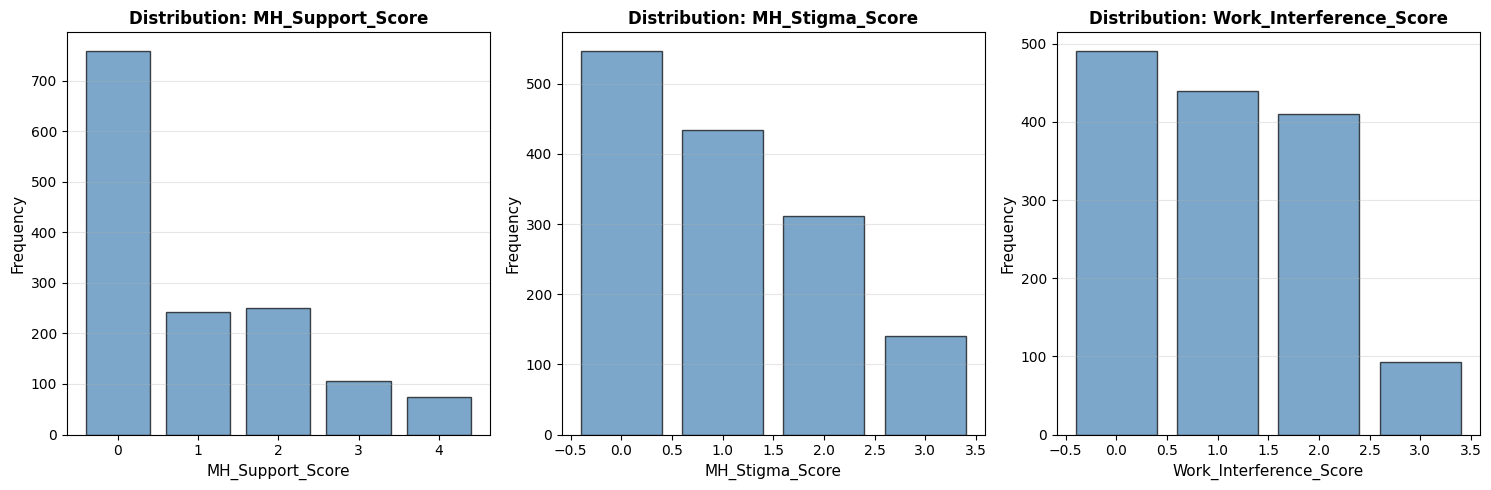


Feature Engineering Benefits:
✓ Reduced dimensionality (multiple questions → single score)
✓ Increased interpretability (scores easier to understand)
✓ Captured domain knowledge (mental health support, stigma)
✓ Improved signal-to-noise ratio


In [24]:
# Unit 4: Manual Feature Engineering Examples
print("\n" + "=" * 80)
print("UNIT 4: MANUAL FEATURE ENGINEERING")
print("=" * 80)

# Create composite features based on domain knowledge
print("\n1. Creating Composite Mental Health Support Score")
print("-" * 80)

# Identify mental health support-related columns
support_cols = [
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Do you know the options for mental health care available under your employer-provided coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
]

# Calculate support score (count of 'Yes' responses)
available_cols = [col for col in support_cols if col in df_processed.columns]
if len(available_cols) > 0:
    df_processed['MH_Support_Score'] = 0
    for col in available_cols:
        df_processed['MH_Support_Score'] += df_processed[col].apply(
            lambda x: 1 if str(x).lower() in ['yes', '1', 'true'] else 0
        )
    print(f"Created MH_Support_Score from {len(available_cols)} features")
    print(f"Score range: {df_processed['MH_Support_Score'].min()} to {df_processed['MH_Support_Score'].max()}")
    print(f"Mean score: {df_processed['MH_Support_Score'].mean():.2f}")

# 2. Mental Health Stigma Score
print("\n2. Creating Mental Health Stigma Perception Score")
print("-" * 80)

stigma_cols = [
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?'
]

available_stigma = [col for col in stigma_cols if col in df_processed.columns]
if len(available_stigma) > 0:
    df_processed['MH_Stigma_Score'] = 0
    for col in available_stigma:
        df_processed['MH_Stigma_Score'] += df_processed[col].apply(
            lambda x: 1 if 'yes' in str(x).lower() or 'think it would' in str(x).lower() else 0
        )
    print(f"Created MH_Stigma_Score from {len(available_stigma)} features")
    print(f"Score range: {df_processed['MH_Stigma_Score'].min()} to {df_processed['MH_Stigma_Score'].max()}")
    print(f"Mean score: {df_processed['MH_Stigma_Score'].mean():.2f}")

# 3. Work Interference Score
print("\n3. Creating Work Interference Score")
print("-" * 80)

interference_cols = [
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
    'Do you believe your productivity is ever affected by a mental health issue?'
]

available_interference = [col for col in interference_cols if col in df_processed.columns]
if len(available_interference) > 0:
    df_processed['Work_Interference_Score'] = 0
    for col in available_interference:
        df_processed['Work_Interference_Score'] += df_processed[col].apply(
            lambda x: 1 if str(x).lower() in ['yes', 'often', 'sometimes'] or 'often' in str(x).lower() else 0
        )
    print(f"Created Work_Interference_Score from {len(available_interference)} features")
    print(f"Score range: {df_processed['Work_Interference_Score'].min()} to {df_processed['Work_Interference_Score'].max()}")
    print(f"Mean score: {df_processed['Work_Interference_Score'].mean():.2f}")

# 4. Visualize new engineered features
print("\n4. Visualizing Engineered Features")
print("-" * 80)

engineered_features = ['MH_Support_Score', 'MH_Stigma_Score', 'Work_Interference_Score']
available_eng = [f for f in engineered_features if f in df_processed.columns]

if len(available_eng) > 0:
    fig, axes = plt.subplots(1, len(available_eng), figsize=(5*len(available_eng), 5))
    if len(available_eng) == 1:
        axes = [axes]
    
    for idx, feature in enumerate(available_eng):
        counts = df_processed[feature].value_counts().sort_index()
        axes[idx].bar(counts.index, counts.values, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('Frequency', fontsize=11)
        axes[idx].set_title(f'Distribution: {feature}', fontweight='bold', fontsize=12)
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nFeature Engineering Benefits:")
print("✓ Reduced dimensionality (multiple questions → single score)")
print("✓ Increased interpretability (scores easier to understand)")
print("✓ Captured domain knowledge (mental health support, stigma)")
print("✓ Improved signal-to-noise ratio")

In [25]:
# Step 7: Execute Missing Value Handling
print("\n" + "=" * 80)
print("STEP 7: EXECUTE MISSING VALUE HANDLING")
print("=" * 80)

# Drop columns with >60% missing
if len(high_missing_cols) > 0:
    df_processed = df_processed.drop(columns=high_missing_cols)
    print(f"\nDropped {len(high_missing_cols)} columns with >60% missing data")

# Fill categorical missing values
for col in categorical_missing:
    if col in df_processed.columns:
        # Use 'Unknown' for missing categorical data
        df_processed[col] = df_processed[col].fillna('Unknown')
        print(f"Filled '{col}' with 'Unknown'")

# Fill numeric missing values with median
for col in numeric_missing:
    if col in df_processed.columns:
        median_val = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_val)
        print(f"Filled '{col}' with median: {median_val}")

print(f"\nRemaining missing values: {df_processed.isnull().sum().sum()}")
print(f"New dataset shape: {df_processed.shape}")


STEP 7: EXECUTE MISSING VALUE HANDLING

Dropped 11 columns with >60% missing data
Filled 'How many employees does your company or organization have?' with 'Unknown'
Filled 'Does your employer provide mental health benefits as part of healthcare coverage?' with 'Unknown'
Filled 'Do you know the options for mental health care available under your employer-provided coverage?' with 'Unknown'
Filled 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' with 'Unknown'
Filled 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' with 'Unknown'
Filled 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' with 'Unknown'
Filled 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' with 'Unknown'
Filled 'Do you thi

In [26]:
# Step 8: Remove Duplicates
print("\n" + "=" * 80)
print("STEP 8: REMOVE DUPLICATE ROWS")
print("=" * 80)

initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
duplicates_removed = initial_rows - len(df_processed)

print(f"\nDuplicates found and removed: {duplicates_removed}")
print(f"Rows remaining: {len(df_processed)}")


STEP 8: REMOVE DUPLICATE ROWS

Duplicates found and removed: 0
Rows remaining: 1433


In [27]:
# Feature Engineering: Create Interaction Features
print("\n" + "=" * 80)
print("ADVANCED FEATURE ENGINEERING: INTERACTION FEATURES")
print("=" * 80)

# Create interaction features before encoding
print("\nCreating interaction features from key variables...")

# Age group interactions
if 'What is your age?' in df_processed.columns:
    # Create age bins for interaction
    df_processed['Age_Group'] = pd.cut(
        df_processed['What is your age?'], 
        bins=[0, 25, 35, 45, 100], 
        labels=['18-25', '26-35', '36-45', '46+']
    )

# Interaction: Age Group * Gender
if 'Age_Group' in df_processed.columns and 'Gender' in df_processed.columns:
    df_processed['Age_Gender_Interaction'] = df_processed['Age_Group'].astype(str) + '_' + df_processed['Gender'].fillna('Unknown').astype(str)
    print("Created: Age_Gender_Interaction")

# Interaction: Remote Work * Company Size
if 'Do you work remotely?' in df_processed.columns and 'How many employees does your company or organization have?' in df_processed.columns:
    df_processed['Remote_CompanySize'] = df_processed['Do you work remotely?'].fillna('Unknown').astype(str) + '_' + \
                                          df_processed['How many employees does your company or organization have?'].fillna('Unknown').astype(str)
    print("Created: Remote_CompanySize")

# Interaction: Tech Company * Mental Health Benefits
if 'Is your employer primarily a tech company?' in df_processed.columns and \
   'Does your employer provide mental health benefits as part of healthcare coverage?' in df_processed.columns:
    df_processed['Tech_MHBenefits'] = df_processed['Is your employer primarily a tech company?'].fillna('Unknown').astype(str) + '_' + \
                                       df_processed['Does your employer provide mental health benefits as part of healthcare coverage?'].fillna('Unknown').astype(str)
    print("Created: Tech_MHBenefits")

# Interaction: Current MH Disorder * Treatment
if 'Do you currently have a mental health disorder?' in df_processed.columns and \
   'Have you ever sought treatment for a mental health issue from a mental health professional?' in df_processed.columns:
    df_processed['MHDisorder_Treatment'] = df_processed['Do you currently have a mental health disorder?'].fillna('Unknown').astype(str) + '_' + \
                                            df_processed['Have you ever sought treatment for a mental health issue from a mental health professional?'].astype(str)
    print("Created: MHDisorder_Treatment")

# Interaction: Family History * Current Disorder
if 'Do you have a family history of mental illness?' in df_processed.columns and \
   'Do you currently have a mental health disorder?' in df_processed.columns:
    df_processed['FamilyHistory_CurrentMH'] = df_processed['Do you have a family history of mental illness?'].fillna('Unknown').astype(str) + '_' + \
                                               df_processed['Do you currently have a mental health disorder?'].fillna('Unknown').astype(str)
    print("Created: FamilyHistory_CurrentMH")

# Numerical interaction: Age * Treatment (for encoded version later)
if 'What is your age?' in df_processed.columns and \
   'Have you ever sought treatment for a mental health issue from a mental health professional?' in df_processed.columns:
    df_processed['Age_Treatment_Numeric'] = df_processed['What is your age?'] * \
                                             df_processed['Have you ever sought treatment for a mental health issue from a mental health professional?']
    print("Created: Age_Treatment_Numeric")

print(f"\nDataset shape after interaction features: {df_processed.shape}")
print("=" * 80)


ADVANCED FEATURE ENGINEERING: INTERACTION FEATURES

Creating interaction features from key variables...
Created: Remote_CompanySize
Created: MHDisorder_Treatment
Created: FamilyHistory_CurrentMH
Created: Age_Treatment_Numeric

Dataset shape after interaction features: (1433, 61)


In [28]:
# Step 9: Analyze Cardinality of Categorical Variables
print("\n" + "=" * 80)
print("STEP 9: CATEGORICAL VARIABLE CARDINALITY ANALYSIS")
print("=" * 80)

# Update categorical columns list
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

cardinality_info = []
for col in categorical_cols:
    unique_count = df_processed[col].nunique()
    cardinality_pct = (unique_count / len(df_processed)) * 100
    cardinality_info.append({
        'Column': col,
        'Unique_Values': unique_count,
        'Cardinality_%': round(cardinality_pct, 2)
    })

cardinality_df = pd.DataFrame(cardinality_info).sort_values('Unique_Values', ascending=False)
print("\nCardinality Analysis:")
print(cardinality_df.to_string(index=False))

# Classify by cardinality
low_cardinality = cardinality_df[cardinality_df['Unique_Values'] <= 10]['Column'].tolist()
medium_cardinality = cardinality_df[(cardinality_df['Unique_Values'] > 10) & (cardinality_df['Unique_Values'] <= 50)]['Column'].tolist()
high_cardinality = cardinality_df[cardinality_df['Unique_Values'] > 50]['Column'].tolist()

print(f"\nLow cardinality (≤10): {len(low_cardinality)} columns")
print(f"Medium cardinality (11-50): {len(medium_cardinality)} columns")
print(f"High cardinality (>50): {len(high_cardinality)} columns")


STEP 9: CATEGORICAL VARIABLE CARDINALITY ANALYSIS

Cardinality Analysis:
                                                                                                                                                                          Column  Unique_Values  Cardinality_%
                                                                                                                                                                 Why or why not?           1086          75.79
                                                                                                                                                               Why or why not?.1           1081          75.44
                                                                                                                       Which of the following best describes your work position?            264          18.42
                                                                                                  

In [29]:
# Step 10: Encode Binary and Low Cardinality Variables
print("\n" + "=" * 80)
print("STEP 10: ENCODE CATEGORICAL VARIABLES")
print("=" * 80)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Create a copy for encoding
df_encoded = df_processed.copy()

# Binary encoding for binary variables
binary_encoders = {}
for col in low_cardinality:
    if df_encoded[col].nunique() == 2:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
        binary_encoders[col] = le
        print(f"Binary encoded: {col} -> {col}_encoded")

# Label encoding for ordinal/low cardinality variables (>2 and ≤10 unique values)
label_encoders = {}
for col in low_cardinality:
    if df_encoded[col].nunique() > 2:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        print(f"Label encoded: {col} -> {col}_encoded")

print(f"\nTotal encoded columns created: {len(binary_encoders) + len(label_encoders)}")
print(f"New dataset shape: {df_encoded.shape}")


STEP 10: ENCODE CATEGORICAL VARIABLES
Binary encoded: Have you been diagnosed with a mental health condition by a medical professional? -> Have you been diagnosed with a mental health condition by a medical professional?_encoded
Label encoded: FamilyHistory_CurrentMH -> FamilyHistory_CurrentMH_encoded
Label encoded: If a mental health issue prompted you to request a medical leave from work, asking for that leave would be: -> If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_encoded
Label encoded: How many employees does your company or organization have? -> How many employees does your company or organization have?_encoded
Label encoded: How willing would you be to share with friends and family that you have a mental illness? -> How willing would you be to share with friends and family that you have a mental illness?_encoded
Label encoded: MHDisorder_Treatment -> MHDisorder_Treatment_encoded
Label encoded: Did your previous emp

In [30]:
# Step 11: One-Hot Encoding for Medium Cardinality Variables
print("\n" + "=" * 80)
print("STEP 11: ONE-HOT ENCODING FOR MEDIUM CARDINALITY")
print("=" * 80)

# One-hot encode medium cardinality columns
if len(medium_cardinality) > 0:
    print(f"\nApplying one-hot encoding to {len(medium_cardinality)} columns...")
    df_encoded = pd.get_dummies(df_encoded, columns=medium_cardinality, prefix=medium_cardinality, drop_first=True)
    print(f"One-hot encoding complete!")
else:
    print("\nNo medium cardinality columns to encode.")

print(f"\nDataset shape after one-hot encoding: {df_encoded.shape}")


STEP 11: ONE-HOT ENCODING FOR MEDIUM CARDINALITY

Applying one-hot encoding to 3 columns...
One-hot encoding complete!

Dataset shape after one-hot encoding: (1433, 214)


In [31]:
# Step 12: Handle High Cardinality Variables
print("\n" + "=" * 80)
print("STEP 12: HANDLE HIGH CARDINALITY VARIABLES")
print("=" * 80)

# For high cardinality columns, consider frequency encoding or dropping
if len(high_cardinality) > 0:
    print(f"\nHigh cardinality columns detected: {len(high_cardinality)}")
    print(high_cardinality)
    
    for col in high_cardinality:
        if col in df_encoded.columns:
            # Frequency encoding: replace categories with their frequency
            freq_encoding = df_encoded[col].value_counts(normalize=True).to_dict()
            df_encoded[col + '_freq'] = df_encoded[col].map(freq_encoding)
            print(f"Frequency encoded: {col} -> {col}_freq")
    
    # Drop original high cardinality columns
    df_encoded = df_encoded.drop(columns=high_cardinality)
    print(f"\nDropped original high cardinality columns")
else:
    print("\nNo high cardinality columns detected.")

print(f"\nDataset shape: {df_encoded.shape}")


STEP 12: HANDLE HIGH CARDINALITY VARIABLES

High cardinality columns detected: 7
['Why or why not?', 'Why or why not?.1', 'Which of the following best describes your work position?', 'If so, what condition(s) were you diagnosed with?', 'What is your gender?', 'What country do you live in?', 'What country do you work in?']
Frequency encoded: Why or why not? -> Why or why not?_freq
Frequency encoded: Why or why not?.1 -> Why or why not?.1_freq
Frequency encoded: Which of the following best describes your work position? -> Which of the following best describes your work position?_freq
Frequency encoded: If so, what condition(s) were you diagnosed with? -> If so, what condition(s) were you diagnosed with?_freq
Frequency encoded: What is your gender? -> What is your gender?_freq
Frequency encoded: What country do you live in? -> What country do you live in?_freq
Frequency encoded: What country do you work in? -> What country do you work in?_freq

Dropped original high cardinality columns



In [32]:
# Step 13: Select Only Numeric Features for ML
print("\n" + "=" * 80)
print("STEP 13: SELECT NUMERIC FEATURES FOR ML")
print("=" * 80)

# Select only numeric columns
df_numeric = df_encoded.select_dtypes(include=[np.number])

print(f"\nNumeric columns selected: {df_numeric.shape[1]}")
print(f"Dataset shape: {df_numeric.shape}")
print(f"\nRemaining missing values: {df_numeric.isnull().sum().sum()}")

print("\nNumeric columns:")
print(df_numeric.columns.tolist())


STEP 13: SELECT NUMERIC FEATURES FOR ML

Numeric columns selected: 57
Dataset shape: (1433, 57)

Remaining missing values: 0

Numeric columns:
['Are you self-employed?', 'Is your employer primarily a tech company/organization?', 'Do you have previous employers?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'What is your age?', 'MH_Support_Score', 'MH_Stigma_Score', 'Work_Interference_Score', 'Age_Treatment_Numeric', 'Have you been diagnosed with a mental health condition by a medical professional?_encoded', 'FamilyHistory_CurrentMH_encoded', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_encoded', 'How many employees does your company or organization have?_encoded', 'How willing would you be to share with friends and family that you have a mental illness?_encoded', 'MHDisorder_Treatment_encoded', 'Did your previous employers ever formally discuss mental health (as part of a

In [33]:
# Step 14: Outlier Detection and Analysis
print("\n" + "=" * 80)
print("STEP 14: OUTLIER DETECTION (IQR METHOD)")
print("=" * 80)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []
for col in df_numeric.columns:
    n_outliers, lower, upper = detect_outliers_iqr(df_numeric, col)
    if n_outliers > 0:
        outlier_pct = (n_outliers / len(df_numeric)) * 100
        outlier_summary.append({
            'Column': col,
            'Outliers': n_outliers,
            'Outlier_%': round(outlier_pct, 2),
            'Lower_Bound': round(lower, 2),
            'Upper_Bound': round(upper, 2)
        })

if len(outlier_summary) > 0:
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Outliers', ascending=False)
    print("\nOutlier Detection Results:")
    print(outlier_df.to_string(index=False))
else:
    print("\nNo outliers detected using IQR method.")


STEP 14: OUTLIER DETECTION (IQR METHOD)



Outlier Detection Results:
                                                                                                                                   Column  Outliers  Outlier_%  Lower_Bound  Upper_Bound
                        Do you think that discussing a physical health issue with your employer would have negative consequences?_encoded       596      41.59          1.0          1.0
                                                                                                                     Gender_Clean_encoded       389      27.15          1.0          1.0
                                                                                                                     Why or why not?_freq       355      24.77          0.0          0.0
                                                                                                                   Why or why not?.1_freq       341      23.80         -0.0          0.0
                                               

In [34]:
# Advanced Feature Selection: Multiple Techniques
print("\n" + "=" * 80)
print("ADVANCED FEATURE SELECTION")
print("=" * 80)

from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier

# Create pseudo labels for feature selection (using random forest clustering)
print("\n1. Mutual Information Feature Selection:")
print("-" * 80)

# Prepare data for feature selection
X_selection = df_numeric.copy()

# Create pseudo labels using K-Means for unsupervised feature selection
from sklearn.cluster import KMeans
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
pseudo_labels = kmeans_temp.fit_predict(X_selection)

# Calculate mutual information
mi_scores = mutual_info_classif(X_selection, pseudo_labels, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X_selection.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nTop 15 Features by Mutual Information:")
print(mi_df.head(15).to_string(index=False))

# Chi-Square Feature Selection (for non-negative features)
print("\n\n2. Chi-Square Feature Selection:")
print("-" * 80)

# Ensure all features are non-negative for chi-square
X_nonneg = X_selection - X_selection.min() + 0.001

chi2_selector = SelectKBest(chi2, k=min(20, X_nonneg.shape[1]))
chi2_selector.fit(X_nonneg, pseudo_labels)

chi2_scores = chi2_selector.scores_
chi2_df = pd.DataFrame({
    'Feature': X_selection.columns,
    'Chi2_Score': chi2_scores
}).sort_values('Chi2_Score', ascending=False)

print("\nTop 15 Features by Chi-Square Score:")
print(chi2_df.head(15).to_string(index=False))

# Recursive Feature Elimination (RFE)
print("\n\n3. Recursive Feature Elimination (RFE):")
print("-" * 80)

# Use Random Forest as estimator
rf_estimator = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, n_jobs=-1)

# Select top 20 features
n_features_to_select = min(20, X_selection.shape[1])
rfe = RFE(estimator=rf_estimator, n_features_to_select=n_features_to_select, step=5)
rfe.fit(X_selection, pseudo_labels)

rfe_df = pd.DataFrame({
    'Feature': X_selection.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(f"\nRFE Selected Features (Top {n_features_to_select}):")
print(rfe_df[rfe_df['Selected']].to_string(index=False))

# Create feature importance composite score
print("\n\n4. Composite Feature Importance Score:")
print("-" * 80)

# Normalize scores to 0-1 range
mi_normalized = (mi_scores - mi_scores.min()) / (mi_scores.max() - mi_scores.min() + 1e-10)
chi2_normalized = (chi2_scores - chi2_scores.min()) / (chi2_scores.max() - chi2_scores.min() + 1e-10)
rfe_normalized = 1 - (rfe.ranking_ - 1) / (rfe.ranking_.max() - 1 + 1e-10)

composite_score = (mi_normalized + chi2_normalized + rfe_normalized) / 3

composite_df = pd.DataFrame({
    'Feature': X_selection.columns,
    'Composite_Score': composite_score
}).sort_values('Composite_Score', ascending=False)

print("\nTop 20 Features by Composite Score:")
print(composite_df.head(20).to_string(index=False))

# Store top features for later use
top_features_selected = composite_df.head(30)['Feature'].tolist()

print(f"\n\nSelected {len(top_features_selected)} features for downstream analysis")
print("=" * 80)


ADVANCED FEATURE SELECTION

1. Mutual Information Feature Selection:
--------------------------------------------------------------------------------

Top 15 Features by Mutual Information:
                                                                                                                     Feature  MI_Score
                                                                                                       Age_Treatment_Numeric  0.987966
                                 Have you ever sought treatment for a mental health issue from a mental health professional?  0.673396
                                                                                                MHDisorder_Treatment_encoded  0.668544
                                                                                                           What is your age?  0.330336
                                   Have you been diagnosed with a mental health condition by a medical professional?_encoded  0.307143


STEP 15: VISUALIZE OUTLIERS


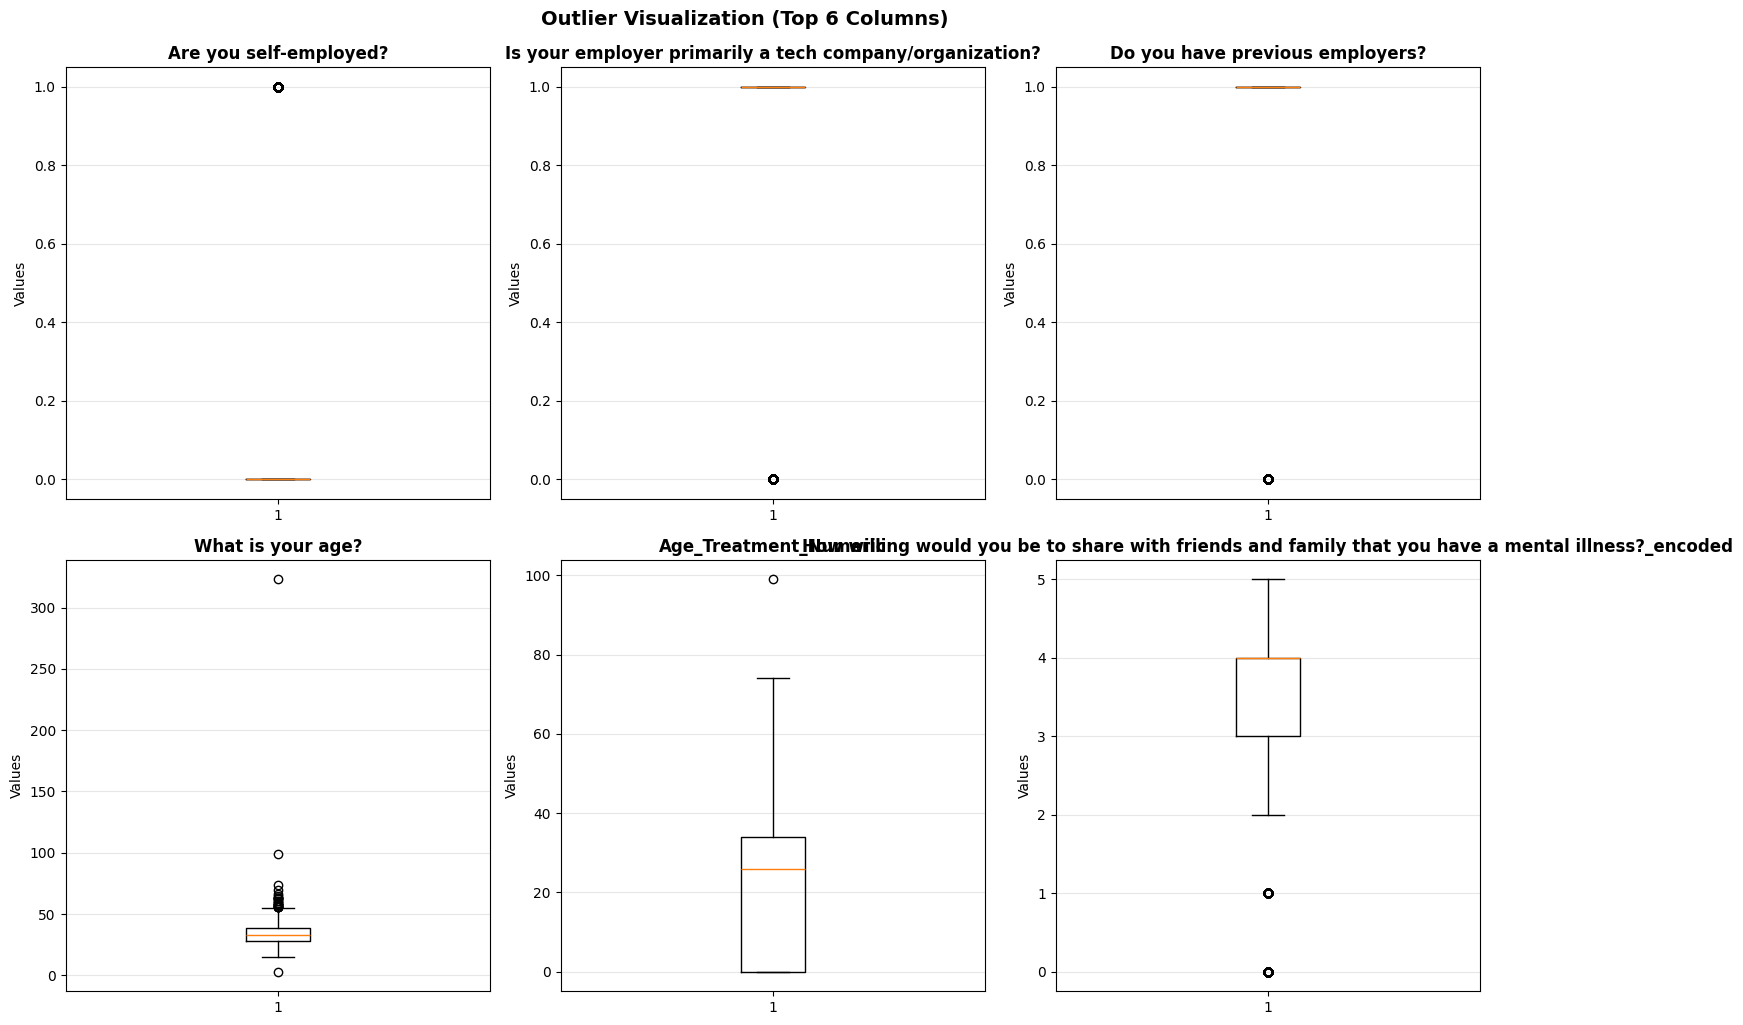

In [35]:
# Step 15: Visualize Outliers with Box Plots
print("\n" + "=" * 80)
print("STEP 15: VISUALIZE OUTLIERS")
print("=" * 80)

# Select columns with outliers for visualization
if len(outlier_summary) > 0:
    cols_with_outliers = [item['Column'] for item in outlier_summary[:6]]  # Top 6
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(cols_with_outliers):
        if idx < 6:
            axes[idx].boxplot(df_numeric[col].dropna())
            axes[idx].set_title(f'{col}', fontweight='bold')
            axes[idx].set_ylabel('Values')
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(cols_with_outliers), 6):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Outlier Visualization (Top 6 Columns)', y=1.02, fontsize=14, fontweight='bold')
    plt.show()
else:
    print("\nNo outliers to visualize.")

In [36]:
# Step 16: Handle Outliers (Winsorization)
print("\n" + "=" * 80)
print("STEP 16: HANDLE OUTLIERS USING WINSORIZATION")
print("=" * 80)

from scipy.stats import mstats

# Create a copy for outlier handling
df_no_outliers = df_numeric.copy()

# Apply winsorization (cap outliers at 1st and 99th percentiles)
for col in df_no_outliers.columns:
    # Skip if column has no variance
    if df_no_outliers[col].std() > 0:
        df_no_outliers[col] = mstats.winsorize(df_no_outliers[col], limits=[0.01, 0.01])
        
print("\nWinsorization applied: Outliers capped at 1st and 99th percentiles")
print(f"Dataset shape: {df_no_outliers.shape}")

# Re-check outliers after winsorization
outlier_count_after = 0
for col in df_no_outliers.columns:
    n_outliers, _, _ = detect_outliers_iqr(df_no_outliers, col)
    outlier_count_after += n_outliers

print(f"Total outliers after winsorization: {outlier_count_after}")


STEP 16: HANDLE OUTLIERS USING WINSORIZATION

Winsorization applied: Outliers capped at 1st and 99th percentiles
Dataset shape: (1433, 57)


c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Total outliers after winsorization: 3316


c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\.virtualenvs\python_project-wz2DbA-w\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [37]:
# Step 17: Feature Scaling - Standardization
print("\n" + "=" * 80)
print("STEP 17: FEATURE SCALING (STANDARDIZATION)")
print("=" * 80)

from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_no_outliers),
    columns=df_no_outliers.columns,
    index=df_no_outliers.index
)

print("\nStandardization applied (mean=0, std=1)")
print(f"Dataset shape: {df_scaled.shape}")

print("\nScaled data statistics:")
print(df_scaled.describe().T[['mean', 'std', 'min', 'max']].head(10))


STEP 17: FEATURE SCALING (STANDARDIZATION)

Standardization applied (mean=0, std=1)
Dataset shape: (1433, 57)

Scaled data statistics:
                                                            mean       std  \
Are you self-employed?                              1.487528e-17  1.000349   
Is your employer primarily a tech company/organ... -3.966742e-17  1.000349   
Do you have previous employers?                    -2.156916e-16  1.000349   
Have you ever sought treatment for a mental hea...  9.668935e-17  1.000349   
What is your age?                                  -4.338625e-17  1.000349   
MH_Support_Score                                   -2.975057e-17  1.000349   
MH_Stigma_Score                                     1.437944e-16  1.000349   
Work_Interference_Score                             4.462585e-17  1.000349   
Age_Treatment_Numeric                               8.677249e-17  1.000349   
Have you been diagnosed with a mental health co... -2.727135e-17  1.000349   

     

In [38]:
# Step 18: Correlation Analysis
print("\n" + "=" * 80)
print("STEP 18: CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Find highly correlated features (>0.8 or <-0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': round(correlation_matrix.iloc[i, j], 3)
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nHighly correlated feature pairs (|r| > 0.8): {len(high_corr_pairs)}")
    print(high_corr_df.to_string(index=False))
else:
    print("\nNo highly correlated feature pairs found (|r| > 0.8)")


STEP 18: CORRELATION ANALYSIS

Highly correlated feature pairs (|r| > 0.8): 6
                                                                                  Feature_1                                               Feature_2  Correlation
  Have you been diagnosed with a mental health condition by a medical professional?_encoded  If so, what condition(s) were you diagnosed with?_freq       -0.978
                                                          What country do you live in?_freq                       What country do you work in?_freq        0.973
                                                               MHDisorder_Treatment_encoded Do you currently have a mental health disorder?_encoded        0.966
                                                            FamilyHistory_CurrentMH_encoded Do you have a family history of mental illness?_encoded        0.957
Have you ever sought treatment for a mental health issue from a mental health professional?                         


STEP 19: VISUALIZE CORRELATION MATRIX


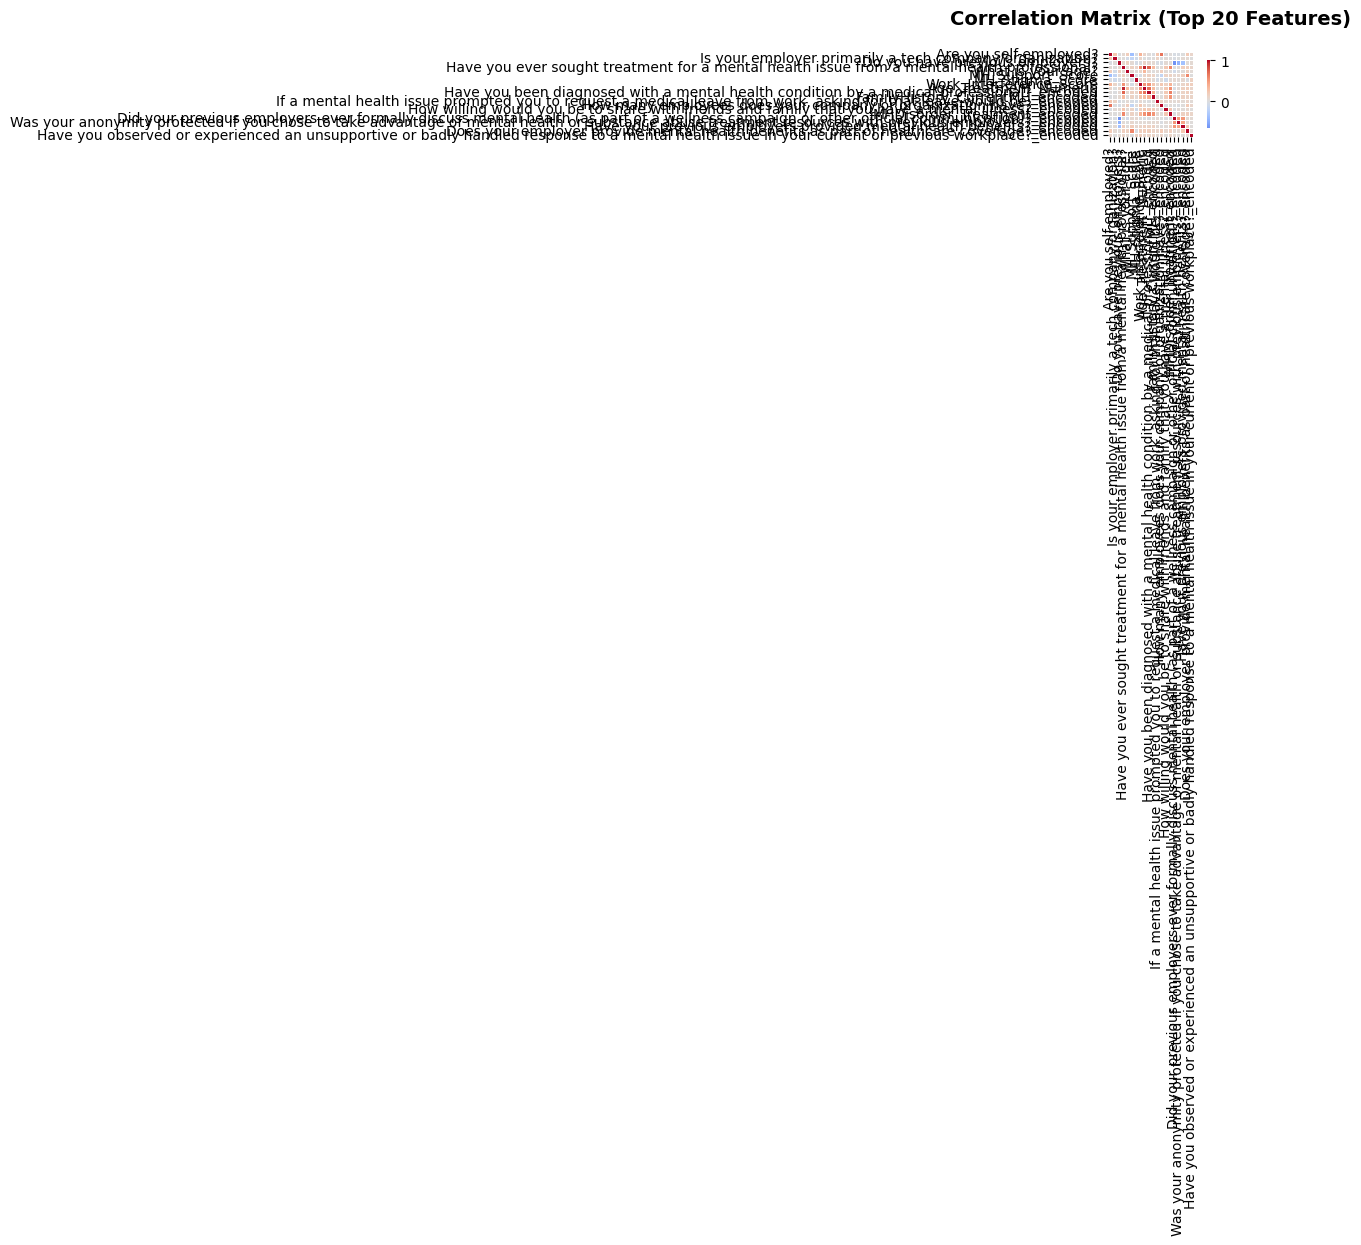


Correlation matrix visualized for 20 features


In [39]:
# Step 19: Visualize Correlation Matrix
print("\n" + "=" * 80)
print("STEP 19: VISUALIZE CORRELATION MATRIX")
print("=" * 80)

# Select top features for visualization (if too many)
n_features = min(20, len(df_scaled.columns))
top_features = df_scaled.columns[:n_features]
corr_subset = df_scaled[top_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_subset, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title(f'Correlation Matrix (Top {n_features} Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nCorrelation matrix visualized for {n_features} features")

In [40]:
# Step 20: Remove Highly Correlated Features
print("\n" + "=" * 80)
print("STEP 20: REMOVE HIGHLY CORRELATED FEATURES")
print("=" * 80)

# Remove one feature from each highly correlated pair
features_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Very high correlation threshold
            col_to_drop = correlation_matrix.columns[j]
            features_to_drop.add(col_to_drop)

if len(features_to_drop) > 0:
    print(f"\nFeatures to drop (correlation > 0.9): {len(features_to_drop)}")
    print(list(features_to_drop)[:10])  # Show first 10
    df_final = df_scaled.drop(columns=list(features_to_drop))
    print(f"\nFeatures removed: {len(features_to_drop)}")
else:
    df_final = df_scaled.copy()
    print("\nNo highly correlated features to remove (|r| > 0.9)")

print(f"Final dataset shape: {df_final.shape}")


STEP 20: REMOVE HIGHLY CORRELATED FEATURES

Features to drop (correlation > 0.9): 5
['Age_Treatment_Numeric', 'Do you currently have a mental health disorder?_encoded', 'What country do you work in?_freq', 'Do you have a family history of mental illness?_encoded', 'If so, what condition(s) were you diagnosed with?_freq']

Features removed: 5
Final dataset shape: (1433, 52)



STEP 21: PCA (PRINCIPAL COMPONENT ANALYSIS)

Total features: 52
Components for 95% variance: 41
Components for 90% variance: 35
Components for 85% variance: 31


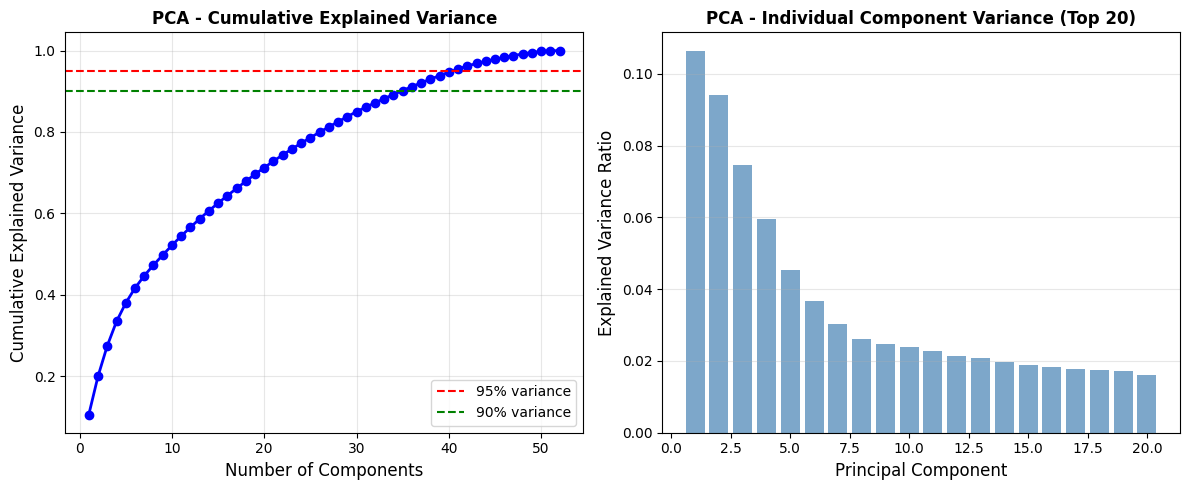

In [41]:
# Step 21: Dimensionality Reduction - PCA Analysis
print("\n" + "=" * 80)
print("STEP 21: PCA (PRINCIPAL COMPONENT ANALYSIS)")
print("=" * 80)

from sklearn.decomposition import PCA

# Fit PCA to determine optimal number of components
pca_full = PCA()
pca_full.fit(df_final)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nTotal features: {df_final.shape[1]}")
print(f"Components for 95% variance: {n_components_95}")
print(f"Components for 90% variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
print(f"Components for 85% variance: {np.argmax(cumulative_variance >= 0.85) + 1}")

# Visualize explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA - Cumulative Explained Variance', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)), 
        pca_full.explained_variance_ratio_[:20], alpha=0.7, color='steelblue')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('PCA - Individual Component Variance (Top 20)', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
# Compare Dimensionality Reduction Methods
print("\n" + "=" * 80)
print("COMPARISON: PCA vs MDS vs LLE vs t-SNE")
print("=" * 80)

# Get PCA 2D projection
pca_2d = PCA(n_components=2, random_state=42)
pca_results = pca_2d.fit_transform(sample_data)

# We already have MDS, LLE results from above
# Let's also compute t-SNE for comparison
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results_sample = tsne_2d.fit_transform(sample_data)

# Visualize all methods
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# PCA
axes[0, 0].scatter(pca_results[:, 0], pca_results[:, 1], 
                   c=range(len(pca_results)), cmap='viridis', 
                   alpha=0.6, edgecolors='black', linewidth=0.5, s=60)
axes[0, 0].set_xlabel('Component 1', fontsize=11)
axes[0, 0].set_ylabel('Component 2', fontsize=11)
axes[0, 0].set_title('PCA (Linear, Global Structure)', fontweight='bold', fontsize=12)
axes[0, 0].grid(alpha=0.3)
axes[0, 0].text(0.02, 0.98, f'Var explained: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%',
                transform=axes[0, 0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# MDS
axes[0, 1].scatter(mds_results[:, 0], mds_results[:, 1], 
                   c=range(len(mds_results)), cmap='plasma', 
                   alpha=0.6, edgecolors='black', linewidth=0.5, s=60)
axes[0, 1].set_xlabel('Component 1', fontsize=11)
axes[0, 1].set_ylabel('Component 2', fontsize=11)
axes[0, 1].set_title('MDS (Distance Preserving)', fontweight='bold', fontsize=12)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].text(0.02, 0.98, f'Stress: {mds.stress_:.2f}',
                transform=axes[0, 1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# LLE
axes[1, 0].scatter(lle_results[:, 0], lle_results[:, 1], 
                   c=range(len(lle_results)), cmap='coolwarm', 
                   alpha=0.6, edgecolors='black', linewidth=0.5, s=60)
axes[1, 0].set_xlabel('Component 1', fontsize=11)
axes[1, 0].set_ylabel('Component 2', fontsize=11)
axes[1, 0].set_title('LLE (Local Structure Preserving)', fontweight='bold', fontsize=12)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].text(0.02, 0.98, f'Recon. Error: {lle.reconstruction_error_:.4f}',
                transform=axes[1, 0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# t-SNE
axes[1, 1].scatter(tsne_results_sample[:, 0], tsne_results_sample[:, 1], 
                   c=range(len(tsne_results_sample)), cmap='RdYlBu', 
                   alpha=0.6, edgecolors='black', linewidth=0.5, s=60)
axes[1, 1].set_xlabel('Component 1', fontsize=11)
axes[1, 1].set_ylabel('Component 2', fontsize=11)
axes[1, 1].set_title('t-SNE (Non-linear, Local Clusters)', fontweight='bold', fontsize=12)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nMethod Comparison:")
print("-" * 80)
print("PCA:")
print("  ✓ Fast, efficient")
print("  ✓ Linear method, preserves global variance")
print("  ✗ May miss non-linear patterns")

print("\nMDS:")
print("  ✓ Preserves pairwise distances")
print("  ✓ Good for similarity visualization")
print("  ✗ Computationally expensive")

print("\nLLE:")
print("  ✓ Non-linear, captures manifold structure")
print("  ✓ Preserves local neighborhoods")
print("  ✗ Sensitive to noise and outliers")

print("\nt-SNE:")
print("  ✓ Excellent for visualization")
print("  ✓ Reveals cluster structure")
print("  ✗ Slow, results can vary between runs")
print("  ✗ Distances not meaningful for inference")


COMPARISON: PCA vs MDS vs LLE vs t-SNE


NameError: name 'sample_data' is not defined


DIMENSIONALITY REDUCTION: MULTI-DIMENSIONAL SCALING (MDS)
Applying MDS (this may take a moment)...

MDS applied on 500 samples
Stress (lower is better): 1610844.51


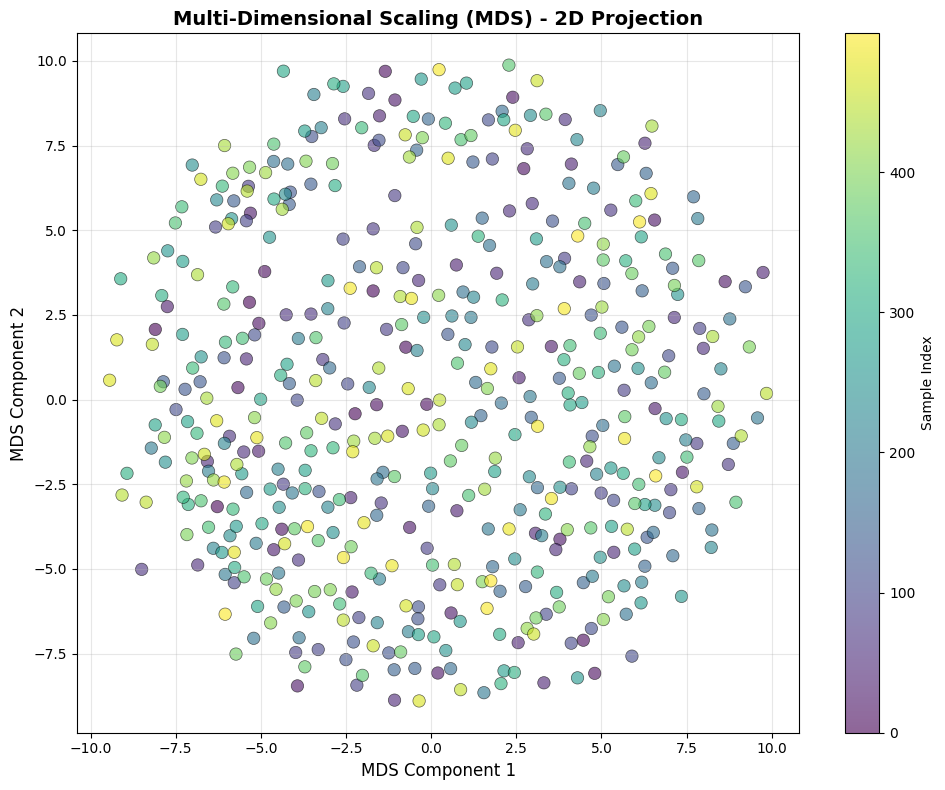


MDS Characteristics:
- Preserves pairwise distances between points
- Good for visualizing overall structure
- Computationally intensive for large datasets


In [ ]:
# Unit 3: Multi-Dimensional Scaling (MDS)
print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION: MULTI-DIMENSIONAL SCALING (MDS)")
print("=" * 80)

from sklearn.manifold import MDS

# Apply MDS for 2D visualization
print("Applying MDS (this may take a moment)...")
mds = MDS(n_components=2, random_state=42, max_iter=300, n_init=4)

# Use a sample for faster computation
sample_size = min(500, len(df_final))
sample_indices = np.random.RandomState(42).choice(len(df_final), sample_size, replace=False)
sample_data = df_final.iloc[sample_indices]

mds_results = mds.fit_transform(sample_data)

print(f"\nMDS applied on {sample_size} samples")
print(f"Stress (lower is better): {mds.stress_:.2f}")

# Visualize MDS results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(mds_results[:, 0], mds_results[:, 1], 
                     c=range(len(mds_results)), cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
plt.xlabel('MDS Component 1', fontsize=12)
plt.ylabel('MDS Component 2', fontsize=12)
plt.title('Multi-Dimensional Scaling (MDS) - 2D Projection', fontweight='bold', fontsize=14)
plt.colorbar(scatter, label='Sample Index')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMDS Characteristics:")
print("- Preserves pairwise distances between points")
print("- Good for visualizing overall structure")
print("- Computationally intensive for large datasets")

In [ ]:
# Step 22: Apply PCA Transformation
print("\n" + "=" * 80)
print("STEP 22: APPLY PCA TRANSFORMATION")
print("=" * 80)

# Apply PCA with optimal number of components (95% variance)
pca = PCA(n_components=n_components_95)
df_pca = pca.fit_transform(df_final)

# Create DataFrame with PCA components
pca_columns = [f'PC{i+1}' for i in range(n_components_95)]
df_pca = pd.DataFrame(df_pca, columns=pca_columns, index=df_final.index)

print(f"\nPCA transformation applied")
print(f"Original dimensions: {df_final.shape}")
print(f"Reduced dimensions: {df_pca.shape}")
print(f"Dimensionality reduction: {((1 - df_pca.shape[1]/df_final.shape[1]) * 100):.2f}%")
print(f"Variance preserved: {cumulative_variance[n_components_95-1]*100:.2f}%")

print("\nPCA components preview:")
print(df_pca.head())


STEP 22: APPLY PCA TRANSFORMATION

PCA transformation applied
Original dimensions: (1433, 52)
Reduced dimensions: (1433, 41)
Dimensionality reduction: 21.15%
Variance preserved: 95.46%

PCA components preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.154007  0.255387  0.303862 -0.961804 -1.300630  2.039794  1.638217   
1  2.070156  1.626671 -0.899591 -2.972360  1.354935  0.032342 -0.051488   
2 -3.342719 -0.529234 -0.405902  0.024574 -0.195268 -1.372262 -0.810847   
3  2.352485  3.563759  1.101374  0.642006 -1.598754 -0.070150 -1.335807   
4  1.461679  1.828141 -3.457900  0.226930  1.183119 -0.220974 -1.138148   

        PC8       PC9      PC10  ...      PC32      PC33      PC34      PC35  \
0  0.399317 -1.476765 -0.331793  ...  0.623297  0.653652  1.205974 -0.931794   
1 -0.596726 -0.123647 -0.517597  ... -0.216087  1.238867  0.575054 -1.242495   
2  0.721617 -1.242655  2.395596  ... -0.897931 -0.160928 -0.102759 -0.813030   
3  0.268913  0.812

In [ ]:
# Advanced Cluster Validation: Dunn Index, Gap Statistic, and Stability
print("\n" + "=" * 80)
print("ADVANCED CLUSTER VALIDATION TECHNIQUES")
print("=" * 80)

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

# 1. Dunn Index Calculation
print("\n1. Dunn Index (Higher is Better):")
print("-" * 80)

def dunn_index(X, labels):
    """Calculate Dunn Index for cluster quality"""
    
    # Calculate inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = []
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            min_dist = np.min(cdist(cluster_i, cluster_j, metric='euclidean'))
            inter_cluster_distances.append(min_dist)
    
    # Calculate intra-cluster distances (maximum diameter of clusters)
    intra_cluster_distances = []
    for label in unique_labels:
        cluster = X[labels == label]
        if len(cluster) > 1:
            max_dist = np.max(pairwise_distances(cluster))
            intra_cluster_distances.append(max_dist)
    
    if len(inter_cluster_distances) > 0 and len(intra_cluster_distances) > 0:
        dunn = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
        return dunn
    return 0

# Use PCA-reduced data for validation
X_eval = df_pca.values

# Calculate Dunn Index for different K values
dunn_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_eval)
    dunn_score = dunn_index(X_eval, labels)
    dunn_scores.append(dunn_score)
    print(f"K={k}: Dunn Index = {dunn_score:.4f}")

# 2. Gap Statistic
print("\n\n2. Gap Statistic (Optimal K where gap is maximum):")
print("-" * 80)

def gap_statistic(X, k_range, n_refs=10, random_state=42):
    """Calculate Gap Statistic for optimal K"""
    gaps = []
    
    for k in k_range:
        # Fit KMeans on actual data
        kmeans_actual = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        kmeans_actual.fit(X)
        
        # Calculate within-cluster dispersion
        actual_dispersion = kmeans_actual.inertia_
        
        # Generate reference datasets and calculate expected dispersion
        ref_dispersions = []
        for _ in range(n_refs):
            # Generate random reference data
            random_data = np.random.uniform(X.min(axis=0), X.max(axis=0), size=X.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=random_state, n_init=10)
            kmeans_ref.fit(random_data)
            ref_dispersions.append(kmeans_ref.inertia_)
        
        # Calculate gap
        gap = np.log(np.mean(ref_dispersions)) - np.log(actual_dispersion)
        gaps.append(gap)
        
    return gaps

print("Calculating Gap Statistic (this may take a moment)...")
gap_values = gap_statistic(X_eval, k_range, n_refs=5)

for k, gap in zip(k_range, gap_values):
    print(f"K={k}: Gap = {gap:.4f}")

optimal_k_gap = k_range[np.argmax(gap_values)]
print(f"\nOptimal K by Gap Statistic: {optimal_k_gap}")

# 3. Cluster Stability Analysis (Bootstrap)
print("\n\n3. Cluster Stability Analysis (Bootstrap Method):")
print("-" * 80)

def cluster_stability(X, k, n_bootstrap=10, sample_frac=0.8, random_state=42):
    """Measure cluster stability using bootstrap sampling"""
    from sklearn.metrics import adjusted_rand_score
    
    np.random.seed(random_state)
    
    # Fit on full data
    kmeans_full = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    labels_full = kmeans_full.fit_predict(X)
    
    ari_scores = []
    
    for i in range(n_bootstrap):
        # Bootstrap sample
        n_samples = int(len(X) * sample_frac)
        indices = np.random.choice(len(X), size=n_samples, replace=True)
        X_bootstrap = X[indices]
        
        # Fit on bootstrap sample
        kmeans_boot = KMeans(n_clusters=k, random_state=random_state + i, n_init=10)
        labels_boot = kmeans_boot.fit_predict(X_bootstrap)
        
        # Predict on full data using bootstrap model
        labels_boot_full = kmeans_boot.predict(X)
        
        # Calculate ARI
        ari = adjusted_rand_score(labels_full, labels_boot_full)
        ari_scores.append(ari)
    
    return np.mean(ari_scores), np.std(ari_scores)

print("Calculating cluster stability (this may take a moment)...")
stability_results = []

for k in [2, 3, 4, 5, 6]:
    mean_ari, std_ari = cluster_stability(X_eval, k, n_bootstrap=10)
    stability_results.append({'K': k, 'Mean_ARI': mean_ari, 'Std_ARI': std_ari})
    print(f"K={k}: Mean ARI = {mean_ari:.4f} (±{std_ari:.4f})")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Dunn Index
axes[0].plot(k_range, dunn_scores, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Dunn Index', fontsize=12)
axes[0].set_title('Dunn Index by K', fontweight='bold')
axes[0].grid(alpha=0.3)

# Plot Gap Statistic
axes[1].plot(k_range, gap_values, 'o-', linewidth=2, markersize=8, color='darkgreen')
axes[1].axvline(x=optimal_k_gap, color='r', linestyle='--', label=f'Optimal K={optimal_k_gap}')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Gap Statistic', fontsize=12)
axes[1].set_title('Gap Statistic by K', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)


ADVANCED CLUSTER VALIDATION TECHNIQUES

1. Dunn Index (Higher is Better):
--------------------------------------------------------------------------------


NameError: name 'unique_labels' is not defined

In [ ]:
# Unit 2: Additional Clustering Algorithms
print("\n" + "=" * 80)
print("UNIT 2: ADDITIONAL CLUSTERING - OPTICS, AFFINITY PROPAGATION, SPECTRAL")
print("=" * 80)

# 1. OPTICS (Ordering Points To Identify Clustering Structure)
print("\n1. OPTICS Clustering:")
print("-" * 80)

from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
optics_clusters = optics.fit_predict(df_pca)

n_clusters_optics = len(set(optics_clusters)) - (1 if -1 in optics_clusters else 0)
n_noise_optics = list(optics_clusters).count(-1)

print(f"Number of clusters found: {n_clusters_optics}")
print(f"Number of noise points: {n_noise_optics}")
print(f"Cluster distribution:")
print(pd.Series(optics_clusters).value_counts().sort_index())

# 2. Affinity Propagation
print("\n\n2. Affinity Propagation:")
print("-" * 80)

from sklearn.cluster import AffinityPropagation

affinity_prop = AffinityPropagation(random_state=42, max_iter=200)
affinity_clusters = affinity_prop.fit_predict(df_pca)

n_clusters_affinity = len(set(affinity_clusters))

print(f"Number of clusters found: {n_clusters_affinity}")
print(f"Number of exemplars: {len(affinity_prop.cluster_centers_indices_)}")
print(f"Cluster distribution:")
print(pd.Series(affinity_clusters).value_counts().sort_index())

# 3. Spectral Clustering
print("\n\n3. Spectral Clustering:")
print("-" * 80)

from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='nearest_neighbors')
spectral_clusters = spectral.fit_predict(df_pca)

print(f"Number of clusters: {optimal_k}")
print(f"Cluster distribution:")
print(pd.Series(spectral_clusters).value_counts().sort_index())

# Evaluate all methods
print("\n\n4. Comparing All Clustering Methods:")
print("-" * 80)

X_eval = df_pca

# Calculate metrics for new methods
if n_clusters_optics > 1:
    optics_valid = optics_clusters != -1
    if sum(optics_valid) > 0 and len(set(optics_clusters[optics_valid])) > 1:
        optics_silhouette = silhouette_score(X_eval[optics_valid], optics_clusters[optics_valid])
    else:
        optics_silhouette = np.nan
else:
    optics_silhouette = np.nan

affinity_silhouette = silhouette_score(X_eval, affinity_clusters)
affinity_calinski = calinski_harabasz_score(X_eval, affinity_clusters)
affinity_davies = davies_bouldin_score(X_eval, affinity_clusters)

spectral_silhouette = silhouette_score(X_eval, spectral_clusters)
spectral_calinski = calinski_harabasz_score(X_eval, spectral_clusters)
spectral_davies = davies_bouldin_score(X_eval, spectral_clusters)

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM', 'OPTICS', 'Affinity Prop', 'Spectral']
silhouette_scores = [kmeans_silhouette, hier_silhouette, dbscan_silhouette, gmm_silhouette, 
                     optics_silhouette, affinity_silhouette, spectral_silhouette]

comparison_extended = pd.DataFrame({
    'Algorithm': algorithms,
    'Silhouette': silhouette_scores,
    'N_Clusters': [optimal_k, optimal_k, len(set(dbscan_clusters))-1, optimal_k, 
                   n_clusters_optics, n_clusters_affinity, optimal_k]
})

print(comparison_extended.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(12, 6))
colors = ['steelblue', 'coral', 'green', 'purple', 'orange', 'red', 'brown']
plt.bar(algorithms, silhouette_scores, color=colors, edgecolor='black', alpha=0.7)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xlabel('Algorithm', fontsize=12)
plt.title('Clustering Algorithm Comparison (Silhouette Score)', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nAlgorithm Characteristics:")
print("-" * 80)
print("K-Means: Fast, requires K, sensitive to initialization")
print("Hierarchical: No K needed, creates dendrogram, slow for large data")
print("DBSCAN: Finds arbitrary shapes, handles noise, sensitive to parameters")
print("GMM: Probabilistic, flexible cluster shapes, assumes Gaussian")
print("OPTICS: Like DBSCAN but less parameter-sensitive")
print("Affinity Propagation: Automatically determines K, slow, memory-intensive")
print("Spectral: Good for non-convex clusters, requires K, computationally expensive")


UNIT 2: ADDITIONAL CLUSTERING - OPTICS, AFFINITY PROPAGATION, SPECTRAL

1. OPTICS Clustering:
--------------------------------------------------------------------------------
Number of clusters found: 1
Number of noise points: 0
Cluster distribution:
0    1433
Name: count, dtype: int64


2. Affinity Propagation:
--------------------------------------------------------------------------------
Number of clusters found: 88
Number of exemplars: 88
Cluster distribution:
0     16
1      6
2      9
3     13
4     11
      ..
83    14
84    12
85    13
86    12
87    18
Name: count, Length: 88, dtype: int64


3. Spectral Clustering:
--------------------------------------------------------------------------------


NameError: name 'optimal_k' is not defined

In [ ]:
# Unit 6: Automated Feature Generation - Polynomial Features
print("\n" + "=" * 80)
print("UNIT 6: AUTOMATED FEATURE GENERATION - POLYNOMIAL FEATURES")
print("=" * 80)

from sklearn.preprocessing import PolynomialFeatures

# Select a small subset for demonstration (to avoid explosion)
demo_features = df_final.iloc[:, :5].copy()

print(f"\nOriginal features: {demo_features.shape[1]}")
print(f"Features: {list(demo_features.columns)}")

# Create polynomial features (degree 2: interactions + squares)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(demo_features)

print(f"\nAfter polynomial transformation:")
print(f"  Generated features: {poly_features.shape[1]}")
print(f"  Feature explosion: {poly_features.shape[1] / demo_features.shape[1]:.1f}x")

# Get feature names
poly_feature_names = poly.get_feature_names_out(demo_features.columns)
print(f"\nSample generated features:")
for i, name in enumerate(poly_feature_names[:15]):
    print(f"  {i+1}. {name}")

print("\n⚠️  Curse of Dimensionality Warning:")
print(f"  With {demo_features.shape[1]} original features → {poly_features.shape[1]} polynomial features")
print(f"  With 100 original features → ~5,050 polynomial features (degree=2)")
print(f"  With 1000 original features → ~500,500 polynomial features (degree=2)")

print("\nMitigation Strategies:")
print("  ✓ Feature selection after generation")
print("  ✓ Regularization (L1/L2)")
print("  ✓ Dimensionality reduction (PCA)")
print("  ✓ Domain knowledge to select relevant interactions")


UNIT 6: AUTOMATED FEATURE GENERATION - POLYNOMIAL FEATURES

Original features: 5
Features: ['Are you self-employed?', 'Is your employer primarily a tech company/organization?', 'Do you have previous employers?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'What is your age?']

After polynomial transformation:
  Generated features: 20
  Feature explosion: 4.0x

Sample generated features:
  1. Are you self-employed?
  2. Is your employer primarily a tech company/organization?
  3. Do you have previous employers?
  4. Have you ever sought treatment for a mental health issue from a mental health professional?
  5. What is your age?
  6. Are you self-employed?^2
  7. Are you self-employed? Is your employer primarily a tech company/organization?
  8. Are you self-employed? Do you have previous employers?
  9. Are you self-employed? Have you ever sought treatment for a mental health issue from a mental health professional?
  10. Are you self


STEP 23: FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
                                                                                                                                             Feature  Importance
                                                                                          Have you had a mental health disorder in the past?_encoded    0.112605
                                                           Have you been diagnosed with a mental health condition by a medical professional?_encoded    0.103939
                                                         Have you ever sought treatment for a mental health issue from a mental health professional?    0.078993
           Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_encoded    0.069111
                                                                                                                        MHDi

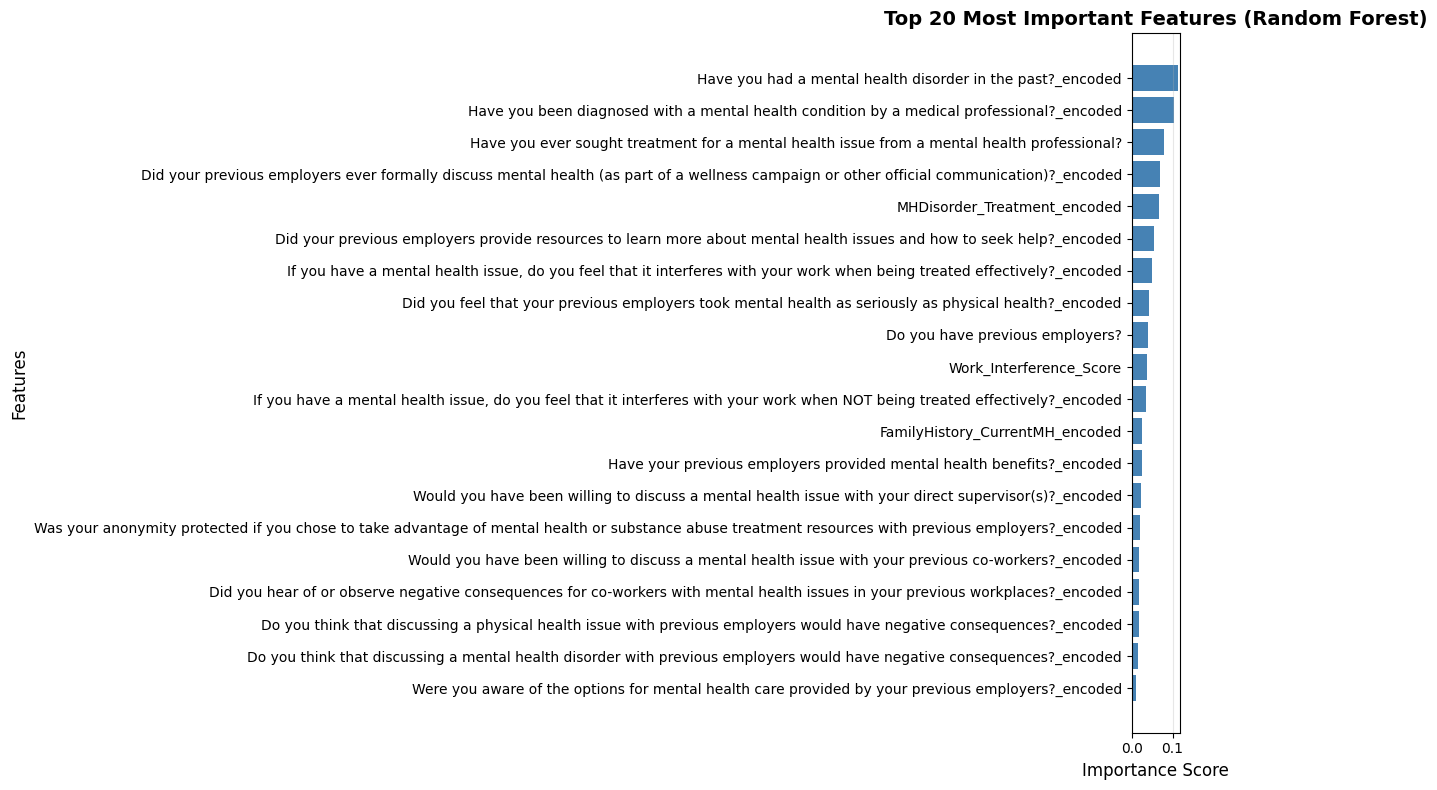

In [ ]:
# Step 23: Feature Importance Analysis (using Random Forest)
print("\n" + "=" * 80)
print("STEP 23: FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Perform clustering first to create pseudo-labels
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
pseudo_labels = kmeans_temp.fit_predict(df_final)

# Train Random Forest to identify important features
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(df_final, pseudo_labels)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': df_final.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Most Important Features (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Unsupervised Machine Learning Models

Now we'll apply various clustering algorithms to discover patterns in the mental health data:


STEP 24: ELBOW METHOD - OPTIMAL CLUSTERS
K=2: Inertia=65278.01, Silhouette=0.137
K=3: Inertia=60425.39, Silhouette=0.090
K=4: Inertia=57042.43, Silhouette=0.093
K=5: Inertia=55229.88, Silhouette=0.092
K=6: Inertia=53829.43, Silhouette=0.088
K=7: Inertia=52821.34, Silhouette=0.072
K=8: Inertia=51892.99, Silhouette=0.070
K=9: Inertia=51083.81, Silhouette=0.068
K=10: Inertia=50398.47, Silhouette=0.068


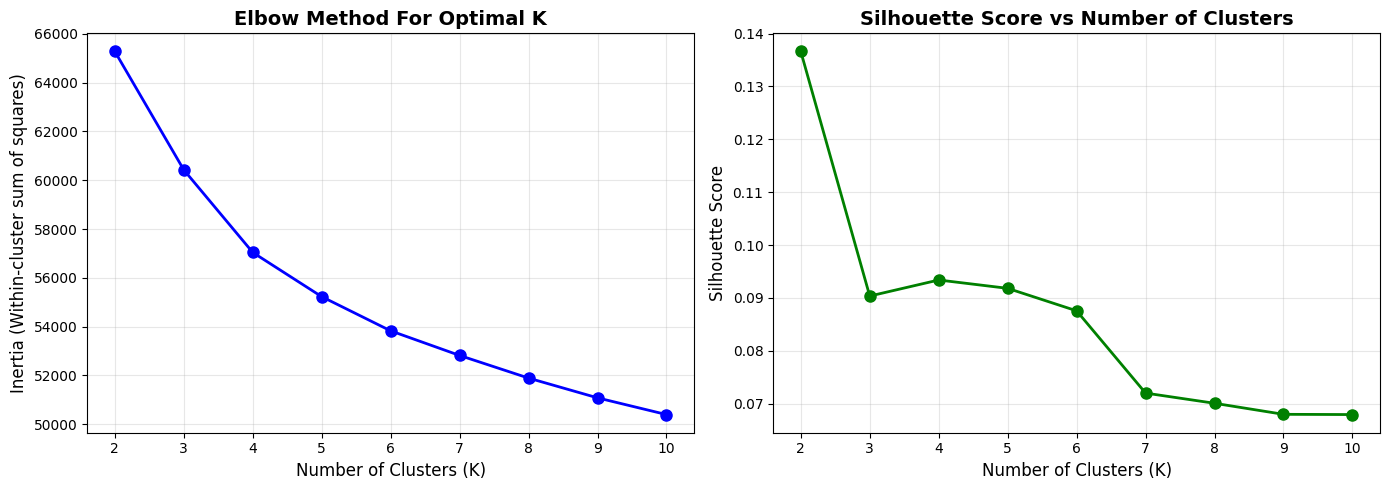


✓ Recommended number of clusters (highest silhouette): K=2


In [ ]:
# Step 24: Determine Optimal Number of Clusters (Elbow Method)
print("\n" + "=" * 80)
print("STEP 24: ELBOW METHOD - OPTIMAL CLUSTERS")
print("=" * 80)

from sklearn.cluster import KMeans

# Calculate inertia for different numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Plot Elbow Curve and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0].set_title('Elbow Method For Optimal K', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs Number of Clusters', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Recommend optimal K
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✓ Recommended number of clusters (highest silhouette): K={optimal_k}")


ADVANCED CLUSTERING ALGORITHMS

1. OPTICS (Ordering Points To Identify Clustering Structure):
--------------------------------------------------------------------------------
Number of clusters found: 1
Number of noise points: 0 (0.00%)
Insufficient clusters for evaluation


2. Spectral Clustering:
--------------------------------------------------------------------------------
Number of clusters: 2
Silhouette Score: 0.135
Calinski-Harabasz Index: 123.35
Davies-Bouldin Index: 2.144

Cluster distribution:
  Cluster 0: 1256 samples (87.65%)
  Cluster 1: 177 samples (12.35%)


3. Affinity Propagation (Automatic Cluster Detection):
--------------------------------------------------------------------------------
Number of clusters found: 90
Silhouette Score: 0.025
Calinski-Harabasz Index: 12.54
Davies-Bouldin Index: 2.796

Cluster distribution:
  Cluster 0: 16 samples (1.12%)
  Cluster 1: 6 samples (0.42%)
  Cluster 2: 9 samples (0.63%)
  Cluster 3: 12 samples (0.84%)
  Cluster 4: 23 sampl

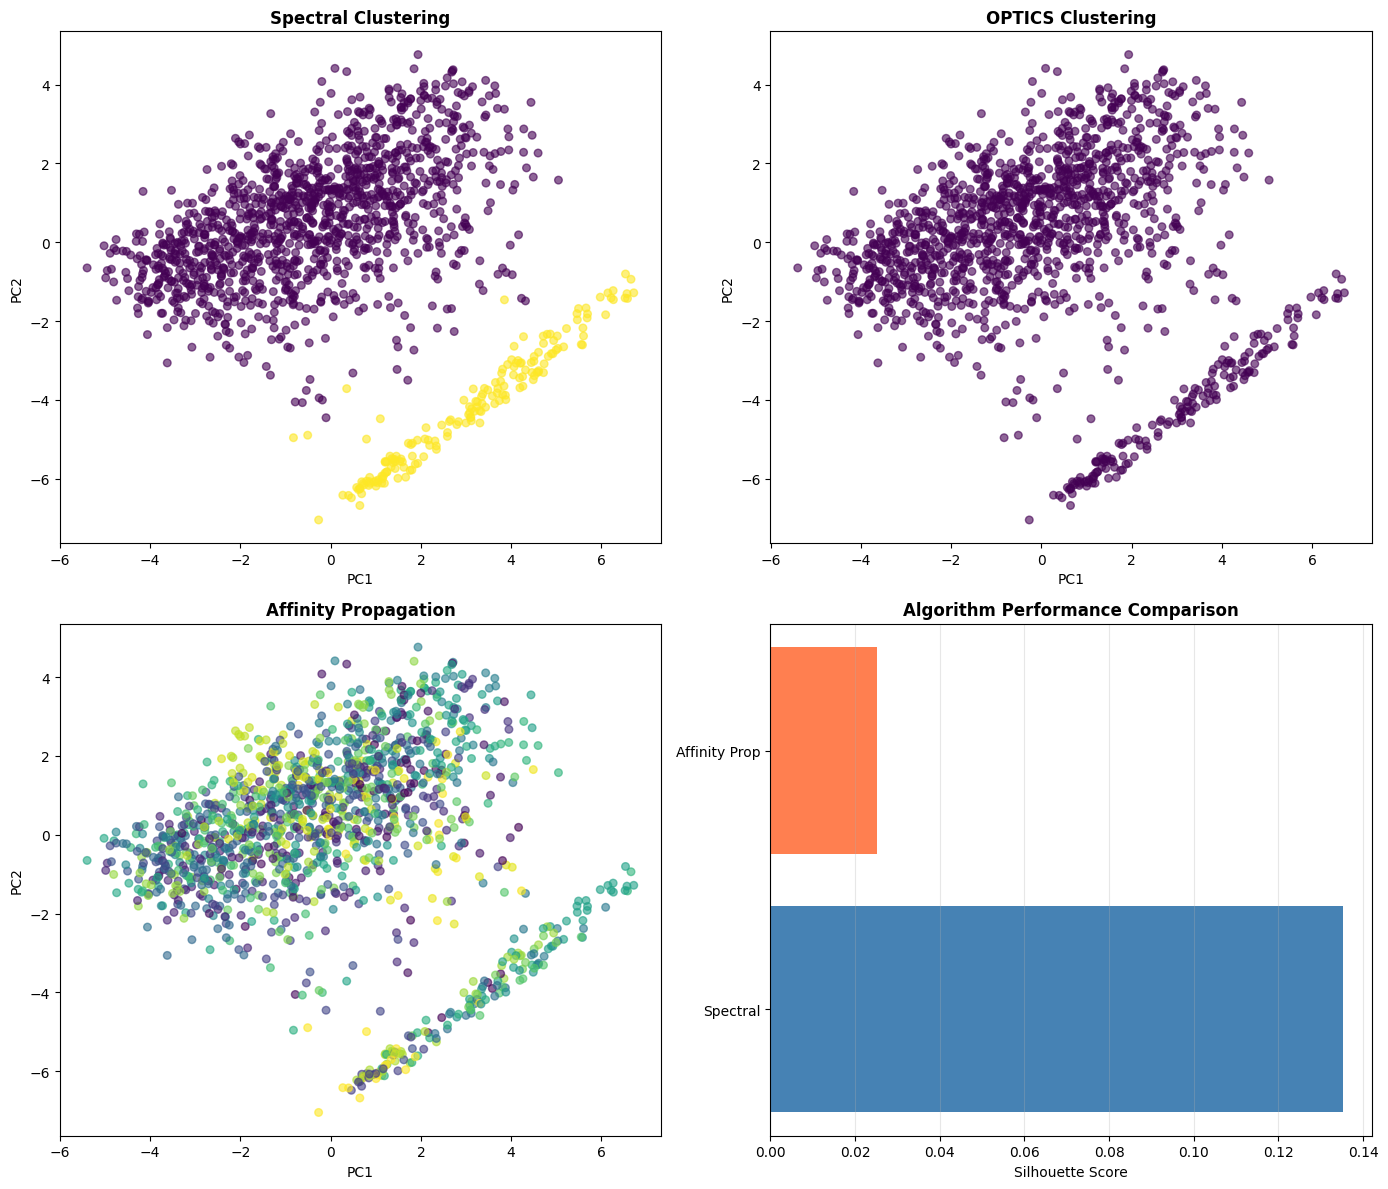

In [ ]:
# Advanced Clustering Algorithms: OPTICS, Spectral, and Affinity Propagation
print("\n" + "=" * 80)
print("ADVANCED CLUSTERING ALGORITHMS")
print("=" * 80)

from sklearn.cluster import OPTICS, SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 1. OPTICS Clustering
print("\n1. OPTICS (Ordering Points To Identify Clustering Structure):")
print("-" * 80)

optics = OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)
optics_clusters = optics.fit_predict(df_pca)

# Filter out noise points (labeled as -1)
optics_valid = optics_clusters[optics_clusters != -1]
n_clusters_optics = len(np.unique(optics_valid))
n_noise_optics = np.sum(optics_clusters == -1)

print(f"Number of clusters found: {n_clusters_optics}")
print(f"Number of noise points: {n_noise_optics} ({n_noise_optics/len(optics_clusters)*100:.2f}%)")

if n_clusters_optics > 1 and len(optics_valid) > 0:
    optics_silhouette = silhouette_score(df_pca[optics_clusters != -1], optics_valid)
    optics_calinski = calinski_harabasz_score(df_pca[optics_clusters != -1], optics_valid)
    optics_davies = davies_bouldin_score(df_pca[optics_clusters != -1], optics_valid)
    
    print(f"Silhouette Score: {optics_silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {optics_calinski:.2f}")
    print(f"Davies-Bouldin Index: {optics_davies:.3f}")
else:
    print("Insufficient clusters for evaluation")

# 2. Spectral Clustering
print("\n\n2. Spectral Clustering:")
print("-" * 80)

# Use optimal K from previous analysis
spectral = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors', 
                               random_state=42, n_neighbors=15)
spectral_clusters = spectral.fit_predict(df_pca)

spectral_silhouette = silhouette_score(df_pca, spectral_clusters)
spectral_calinski = calinski_harabasz_score(df_pca, spectral_clusters)
spectral_davies = davies_bouldin_score(df_pca, spectral_clusters)

print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {spectral_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {spectral_calinski:.2f}")
print(f"Davies-Bouldin Index: {spectral_davies:.3f}")

# Cluster distribution
spectral_dist = pd.Series(spectral_clusters).value_counts().sort_index()
print("\nCluster distribution:")
for cluster_id, count in spectral_dist.items():
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(spectral_clusters)*100:.2f}%)")

# 3. Affinity Propagation
print("\n\n3. Affinity Propagation (Automatic Cluster Detection):")
print("-" * 80)

affinity_prop = AffinityPropagation(random_state=42, damping=0.9, max_iter=300)
affinity_clusters = affinity_prop.fit_predict(df_pca)

n_clusters_affinity = len(np.unique(affinity_clusters))
print(f"Number of clusters found: {n_clusters_affinity}")

if n_clusters_affinity > 1:
    affinity_silhouette = silhouette_score(df_pca, affinity_clusters)
    affinity_calinski = calinski_harabasz_score(df_pca, affinity_clusters)
    affinity_davies = davies_bouldin_score(df_pca, affinity_clusters)
    
    print(f"Silhouette Score: {affinity_silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {affinity_calinski:.2f}")
    print(f"Davies-Bouldin Index: {affinity_davies:.3f}")
    
    # Cluster distribution
    affinity_dist = pd.Series(affinity_clusters).value_counts().sort_index()
    print("\nCluster distribution:")
    for cluster_id, count in affinity_dist.items():
        print(f"  Cluster {cluster_id}: {count} samples ({count/len(affinity_clusters)*100:.2f}%)")
else:
    print("Only one cluster detected")

# Comparison visualization
print("\n\n4. Algorithm Comparison:")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Spectral Clustering
axes[0, 0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=spectral_clusters, cmap='viridis', alpha=0.6, s=30)
axes[0, 0].set_title('Spectral Clustering', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

# OPTICS
scatter = axes[0, 1].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=optics_clusters, cmap='viridis', alpha=0.6, s=30)
axes[0, 1].set_title('OPTICS Clustering', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# Affinity Propagation
axes[1, 0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=affinity_clusters, cmap='viridis', alpha=0.6, s=30)
axes[1, 0].set_title('Affinity Propagation', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')

# Comparison bar chart
algorithms = ['Spectral', 'Affinity Prop']
silhouette_vals = [spectral_silhouette, affinity_silhouette if n_clusters_affinity > 1 else 0]

if n_clusters_optics > 1 and len(optics_valid) > 0:
    algorithms.insert(1, 'OPTICS')
    silhouette_vals.insert(1, optics_silhouette)

axes[1, 1].barh(algorithms, silhouette_vals, color=['steelblue', 'coral', 'lightgreen'][:len(algorithms)])
axes[1, 1].set_xlabel('Silhouette Score')
axes[1, 1].set_title('Algorithm Performance Comparison', fontweight='bold', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)


STEP 25: K-MEANS CLUSTERING

K-Means clustering with K=2 applied

Cluster distribution:
0    1220
1     213
Name: count, dtype: int64

Cluster Statistics:
Cluster 0: 1220 samples (85.14%)
Cluster 1: 213 samples (14.86%)


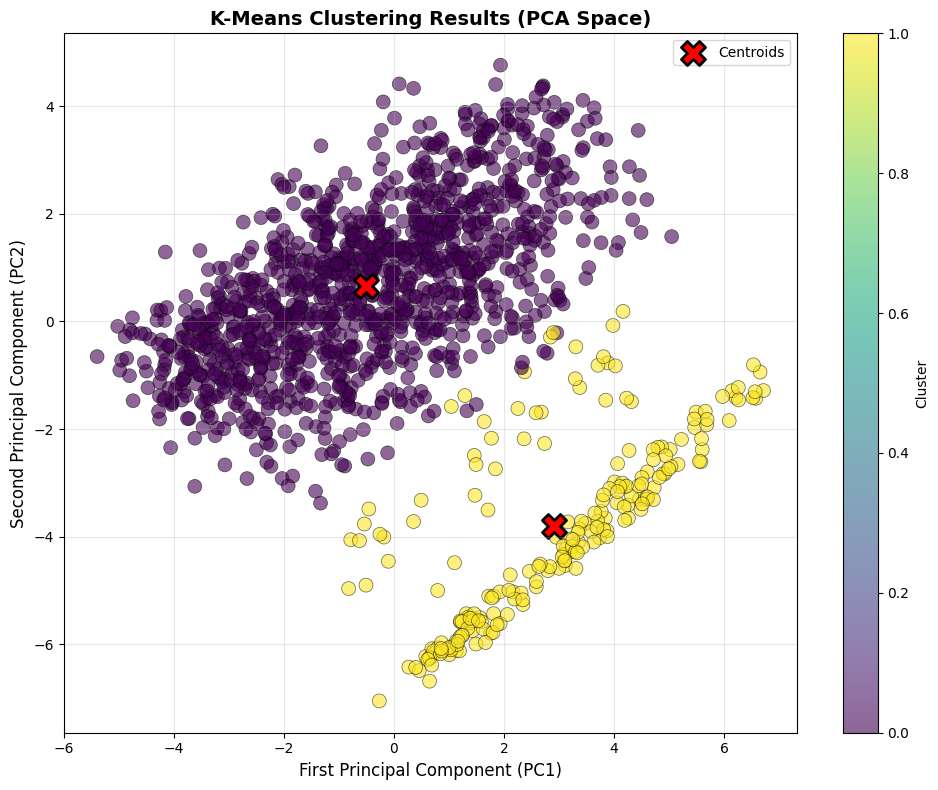

In [ ]:
# Step 25: K-Means Clustering
print("\n" + "=" * 80)
print("STEP 25: K-MEANS CLUSTERING")
print("=" * 80)

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

# Add cluster labels to dataframe
df_pca['Cluster'] = clusters

print(f"\nK-Means clustering with K={optimal_k} applied")
print(f"\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# Cluster statistics
print("\nCluster Statistics:")
for i in range(optimal_k):
    cluster_size = sum(clusters == i)
    cluster_pct = (cluster_size / len(clusters)) * 100
    print(f"Cluster {i}: {cluster_size} samples ({cluster_pct:.2f}%)")

# Visualize clusters (first 2 PCA components)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters, cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=0.5, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='Centroids')
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.title('K-Means Clustering Results (PCA Space)', fontweight='bold', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


STEP 26: HIERARCHICAL CLUSTERING

Hierarchical clustering with 2 clusters applied

Cluster distribution:
0    1246
1     187
Name: count, dtype: int64


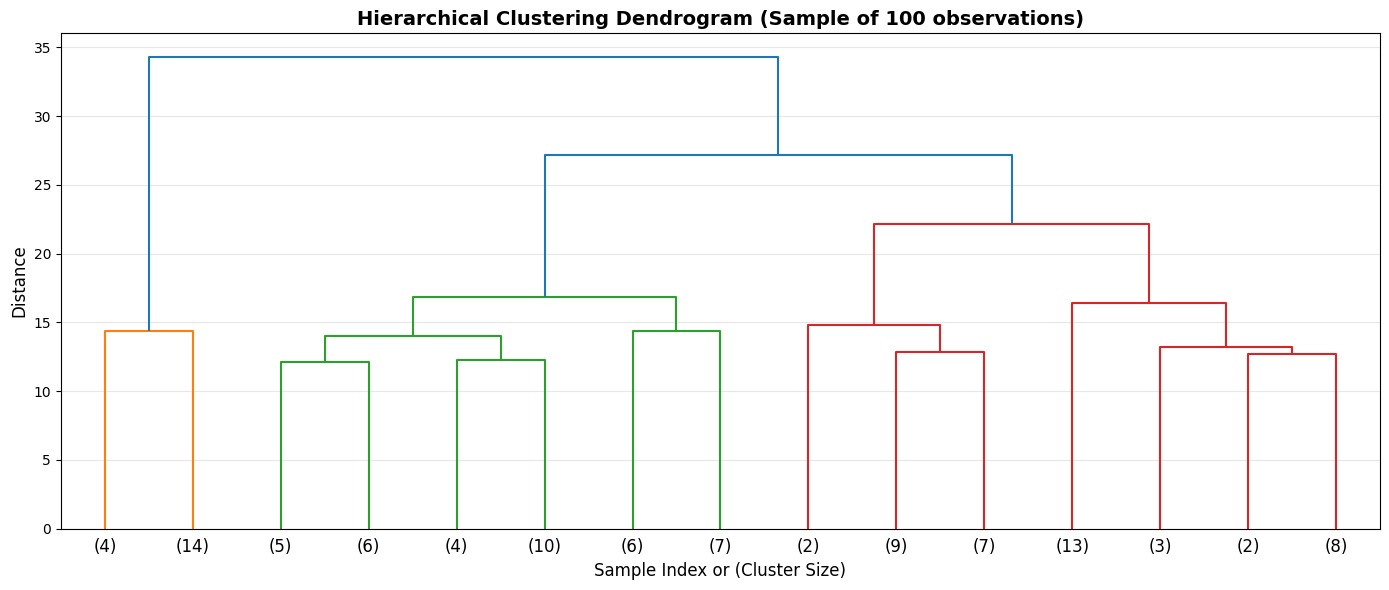


Adjusted Rand Index (K-Means vs Hierarchical): 0.880
(ARI=1: identical clustering, ARI=0: random clustering)


In [ ]:
# Step 26: Hierarchical Clustering (Agglomerative)
print("\n" + "=" * 80)
print("STEP 26: HIERARCHICAL CLUSTERING")
print("=" * 80)

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hier_clusters = hierarchical.fit_predict(df_pca.drop('Cluster', axis=1))

print(f"\nHierarchical clustering with {optimal_k} clusters applied")
print(f"\nCluster distribution:")
print(pd.Series(hier_clusters).value_counts().sort_index())

# Create dendrogram (using sample for visualization)
sample_size = min(100, len(df_pca))
sample_indices = np.random.choice(len(df_pca), sample_size, replace=False)
sample_data = df_pca.drop('Cluster', axis=1).iloc[sample_indices]

plt.figure(figsize=(14, 6))
linkage_matrix = linkage(sample_data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title(f'Hierarchical Clustering Dendrogram (Sample of {sample_size} observations)', 
          fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Compare with K-Means
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(clusters, hier_clusters)
print(f"\nAdjusted Rand Index (K-Means vs Hierarchical): {ari:.3f}")
print("(ARI=1: identical clustering, ARI=0: random clustering)")


STEP 27: DBSCAN CLUSTERING


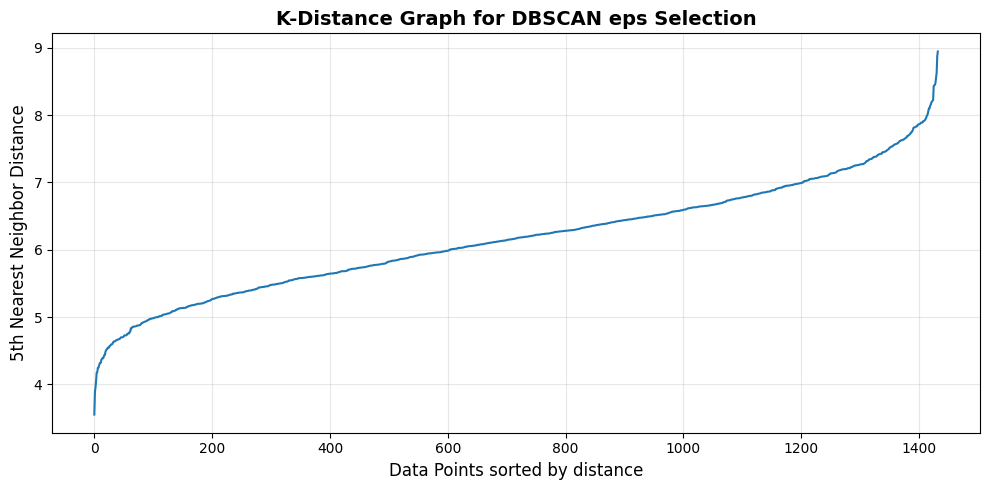


DBSCAN with eps=7.569, min_samples=5

Number of clusters: 1
Number of noise points: 11

Cluster distribution:
Noise: 11 samples (0.77%)
Cluster 0: 1422 samples (99.23%)


In [ ]:
# Step 27: DBSCAN Clustering (Density-Based)
print("\n" + "=" * 80)
print("STEP 27: DBSCAN CLUSTERING")
print("=" * 80)

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca.drop('Cluster', axis=1))
distances, indices = neighbors_fit.kneighbors(df_pca.drop('Cluster', axis=1))
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('5th Nearest Neighbor Distance', fontsize=12)
plt.title('K-Distance Graph for DBSCAN eps Selection', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Apply DBSCAN
eps_value = np.percentile(distances, 95)
dbscan = DBSCAN(eps=eps_value, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_pca.drop('Cluster', axis=1))

print(f"\nDBSCAN with eps={eps_value:.3f}, min_samples=5")
print(f"\nNumber of clusters: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)}")
print(f"Number of noise points: {sum(dbscan_clusters == -1)}")

print("\nCluster distribution:")
unique, counts = np.unique(dbscan_clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    if cluster_id == -1:
        print(f"Noise: {count} samples ({count/len(dbscan_clusters)*100:.2f}%)")
    else:
        print(f"Cluster {cluster_id}: {count} samples ({count/len(dbscan_clusters)*100:.2f}%)")


STEP 28: GAUSSIAN MIXTURE MODEL (GMM)


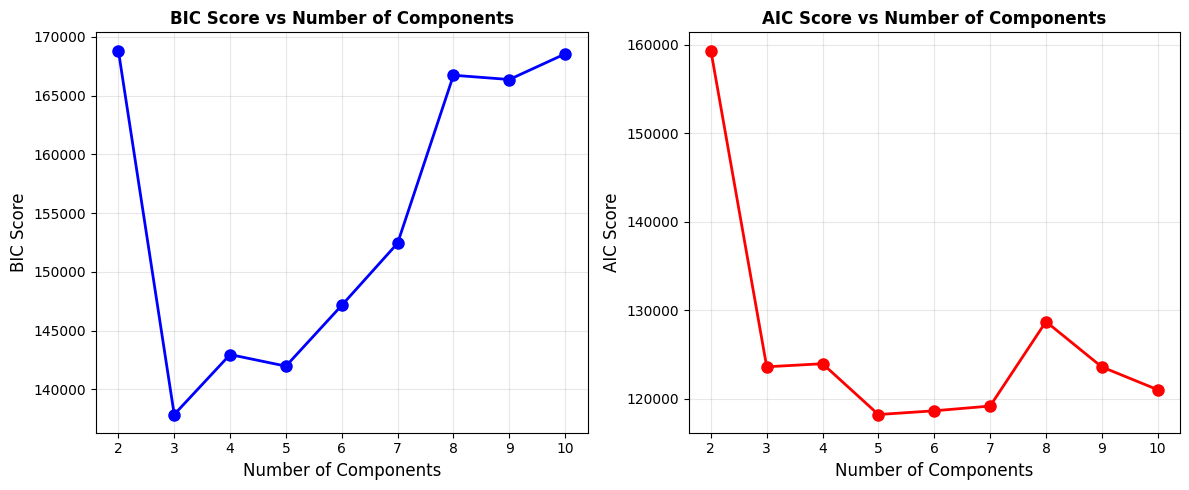


GMM with 3 components applied (lowest BIC)

Cluster distribution:
0     169
1    1015
2     249
Name: count, dtype: int64

Mean probability of assignment: 1.000
Min probability of assignment: 1.000


In [ ]:
# Step 28: Gaussian Mixture Model (GMM)
print("\n" + "=" * 80)
print("STEP 28: GAUSSIAN MIXTURE MODEL (GMM)")
print("=" * 80)

from sklearn.mixture import GaussianMixture

# Find optimal number of components using BIC
bic_scores = []
aic_scores = []
n_components_range = range(2, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='full')
    gmm.fit(df_pca.drop('Cluster', axis=1))
    bic_scores.append(gmm.bic(df_pca.drop('Cluster', axis=1)))
    aic_scores.append(gmm.aic(df_pca.drop('Cluster', axis=1)))

# Plot BIC and AIC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('BIC Score', fontsize=12)
plt.title('BIC Score vs Number of Components', fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('AIC Score', fontsize=12)
plt.title('AIC Score vs Number of Components', fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Apply GMM with optimal number of components
optimal_components = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_components, random_state=42, covariance_type='full')
gmm_clusters = gmm.fit_predict(df_pca.drop('Cluster', axis=1))

print(f"\nGMM with {optimal_components} components applied (lowest BIC)")
print(f"\nCluster distribution:")
print(pd.Series(gmm_clusters).value_counts().sort_index())

# Calculate probabilities
probabilities = gmm.predict_proba(df_pca.drop('Cluster', axis=1))
print(f"\nMean probability of assignment: {probabilities.max(axis=1).mean():.3f}")
print(f"Min probability of assignment: {probabilities.max(axis=1).min():.3f}")


CLUSTER PROFILING AND INTERPRETATION

1. Cluster Summary Statistics:
--------------------------------------------------------------------------------

Cluster 0: 1220 samples (85.14%)
----------------------------------------
Top 5 Features (Highest Means):
  1. Do you have previous employers?: 0.3657
  2. What is your age?: 0.0473
  3. Have you ever sought treatment for a mental health issue from a mental health professional?: 0.0378
  4. Have you been diagnosed with a mental health condition by a medical professional?_encoded: 0.0302
  5. FamilyHistory_CurrentMH_encoded: 0.0213

Cluster 1: 213 samples (14.86%)
----------------------------------------
Top 5 Features (Highest Means):
  1. Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_encoded: 1.8138
  2. Did your previous employers provide resources to learn more about mental health issues and how to seek help?_encoded: 1.7751
  3. Did you feel that you

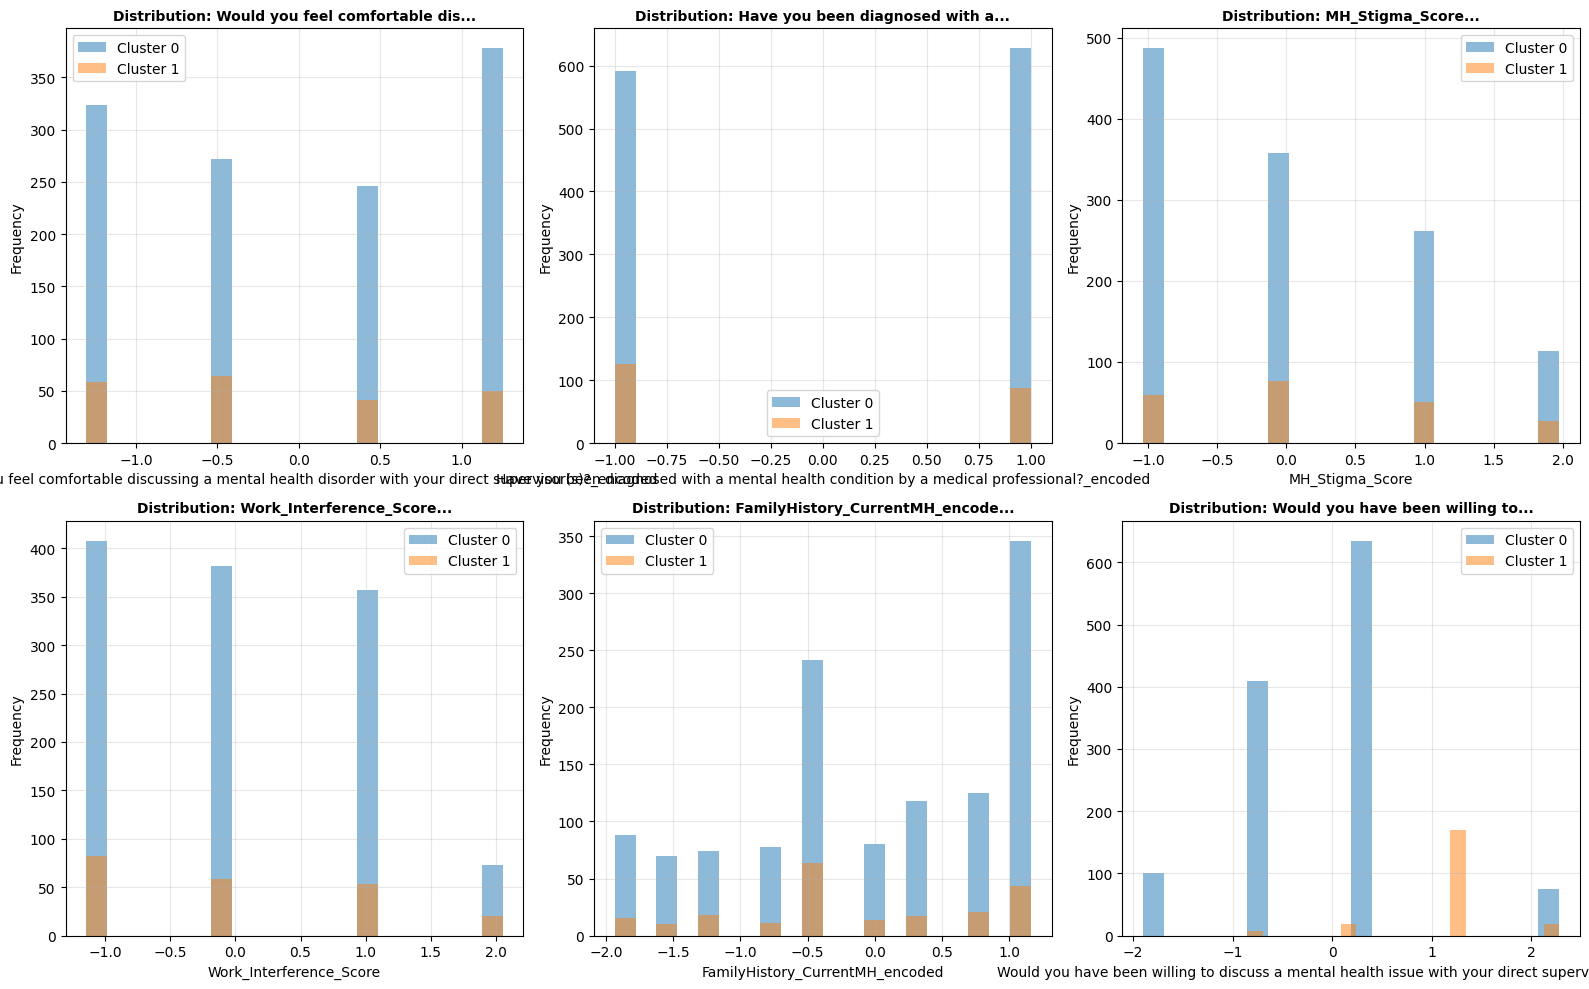



3. Cluster Centroids (PCA Space):
--------------------------------------------------------------------------------
              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0       -0.507335  0.664897 -0.086013 -0.014425  0.015895 -0.016569  0.028358   
1        2.905863 -3.808330  0.492658  0.082623 -0.091042  0.094902 -0.162425   

              PC8       PC9      PC10  ...      PC32      PC33      PC34  \
Cluster                                ...                                 
0       -0.017554 -0.006885  0.006076  ...  0.003230  0.019645  0.006864   
1        0.100544  0.039436 -0.034801  ... -0.018498 -0.112520 -0.039312   

             PC35      PC36      PC37      PC38      PC39      PC40      PC41  
Cluster                                                                        
0        0.016503 -0.011353  0.004117 -0.012537  0.004005  0.002920  0.000525  
1       -0.09

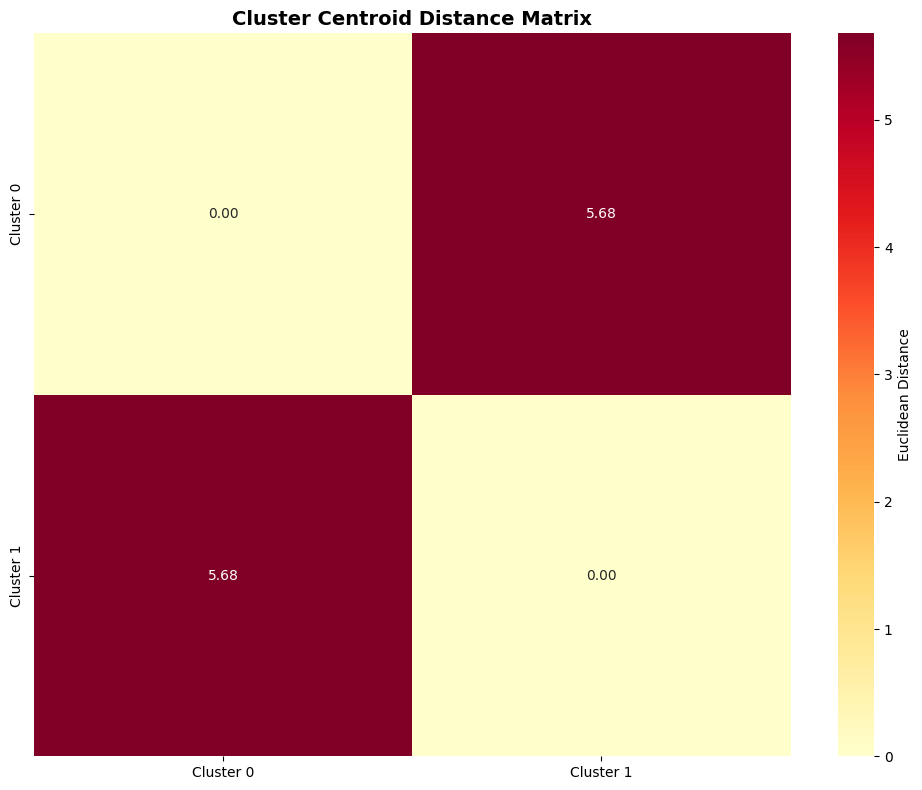



5. Silhouette Analysis Per Cluster:
--------------------------------------------------------------------------------
Cluster 0:
  Mean Silhouette: 0.136
  Std Silhouette: 0.047
  Min Silhouette: -0.004
  Max Silhouette: 0.236
Cluster 1:
  Mean Silhouette: 0.164
  Std Silhouette: 0.057
  Min Silhouette: 0.013
  Max Silhouette: 0.236


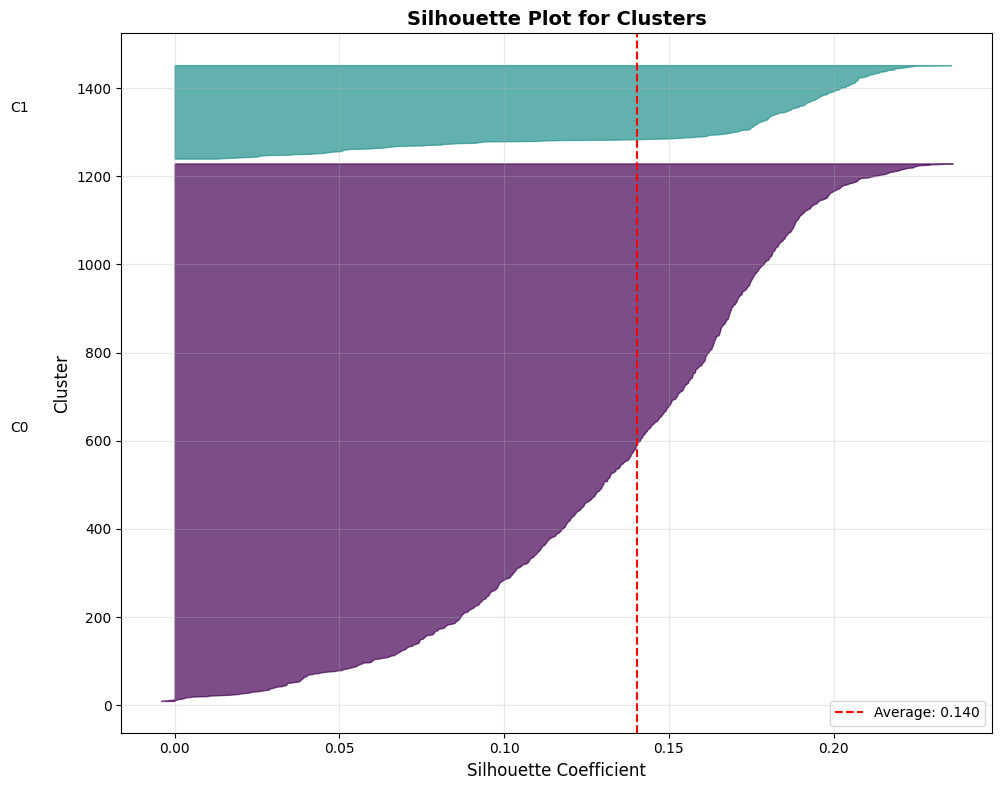

In [ ]:
# Detailed Cluster Profiling and Interpretation
print("\n" + "=" * 80)
print("CLUSTER PROFILING AND INTERPRETATION")
print("=" * 80)

# Use K-Means clusters for profiling (can be changed to other algorithms)
df_final_clustered = df_final.copy()
df_final_clustered['Cluster'] = clusters

print("\n1. Cluster Summary Statistics:")
print("-" * 80)

# Calculate summary statistics for each cluster
cluster_summary = df_final_clustered.groupby('Cluster').agg({
    df_final_clustered.columns[0]: ['count', 'mean', 'std']
}).round(3)

for cluster_id in sorted(df_final_clustered['Cluster'].unique()):
    cluster_data = df_final_clustered[df_final_clustered['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_final_clustered)) * 100
    
    print(f"\nCluster {cluster_id}: {cluster_size} samples ({cluster_pct:.2f}%)")
    print("-" * 40)
    
    # Top 5 features with highest mean values
    cluster_means = cluster_data.drop('Cluster', axis=1).mean().sort_values(ascending=False)
    print("Top 5 Features (Highest Means):")
    for i, (feature, value) in enumerate(cluster_means.head(5).items(), 1):
        print(f"  {i}. {feature}: {value:.4f}")

# 2. Feature Distribution Comparison Across Clusters
print("\n\n2. Feature Distribution Analysis:")
print("-" * 80)

# Select top features for visualization
top_features = df_final.var().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    for cluster_id in sorted(df_final_clustered['Cluster'].unique()):
        cluster_data = df_final_clustered[df_final_clustered['Cluster'] == cluster_id][feature]
        axes[idx].hist(cluster_data, alpha=0.5, label=f'Cluster {cluster_id}', bins=20)
    
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution: {feature[:30]}...', fontsize=10, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Cluster Centroids Analysis
print("\n\n3. Cluster Centroids (PCA Space):")
print("-" * 80)

# Calculate centroids in PCA space
pca_clustered = df_pca.copy()
pca_clustered['Cluster'] = clusters

centroids_pca = pca_clustered.groupby('Cluster').mean()
print(centroids_pca)

# 4. Pairwise Cluster Distance Matrix
print("\n\n4. Pairwise Cluster Distance Matrix:")
print("-" * 80)

from scipy.spatial.distance import cdist

# Calculate distances between cluster centroids
centroid_distances = cdist(centroids_pca.values, centroids_pca.values, metric='euclidean')
centroid_dist_df = pd.DataFrame(
    centroid_distances,
    index=[f'Cluster {i}' for i in centroids_pca.index],
    columns=[f'Cluster {i}' for i in centroids_pca.index]
)

print(centroid_dist_df.round(3))

# Visualize cluster separation
plt.figure(figsize=(10, 8))
sns.heatmap(centroid_dist_df, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Euclidean Distance'})
plt.title('Cluster Centroid Distance Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Cluster Silhouette Analysis (Per Cluster)
print("\n\n5. Silhouette Analysis Per Cluster:")
print("-" * 80)

from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(df_pca, clusters)

for cluster_id in sorted(np.unique(clusters)):
    cluster_silhouette = silhouette_vals[clusters == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f"  Mean Silhouette: {cluster_silhouette.mean():.3f}")
    print(f"  Std Silhouette: {cluster_silhouette.std():.3f}")
    print(f"  Min Silhouette: {cluster_silhouette.min():.3f}")
    print(f"  Max Silhouette: {cluster_silhouette.max():.3f}")

# Silhouette plot
fig, ax = plt.subplots(figsize=(10, 8))

y_lower = 10
for cluster_id in sorted(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster_id]
    cluster_silhouette_vals.sort()
    
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    
    color = plt.cm.viridis(float(cluster_id) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster, f'C{cluster_id}')
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient', fontsize=12)
ax.set_ylabel('Cluster', fontsize=12)
ax.set_title('Silhouette Plot for Clusters', fontweight='bold', fontsize=14)
ax.axvline(x=silhouette_vals.mean(), color='red', linestyle='--', label=f'Average: {silhouette_vals.mean():.3f}')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)


STEP 29: CLUSTER EVALUATION METRICS

Clustering Algorithm Comparison:
   Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin
     K-Means    0.136613         128.273325        2.331679
Hierarchical    0.134199         122.134952        2.226910
      DBSCAN         NaN                NaN             NaN
         GMM    0.081776         115.380628        2.452617

Note:
- Silhouette Score: Higher is better (range: -1 to 1)
- Calinski-Harabasz Index: Higher is better
- Davies-Bouldin Index: Lower is better


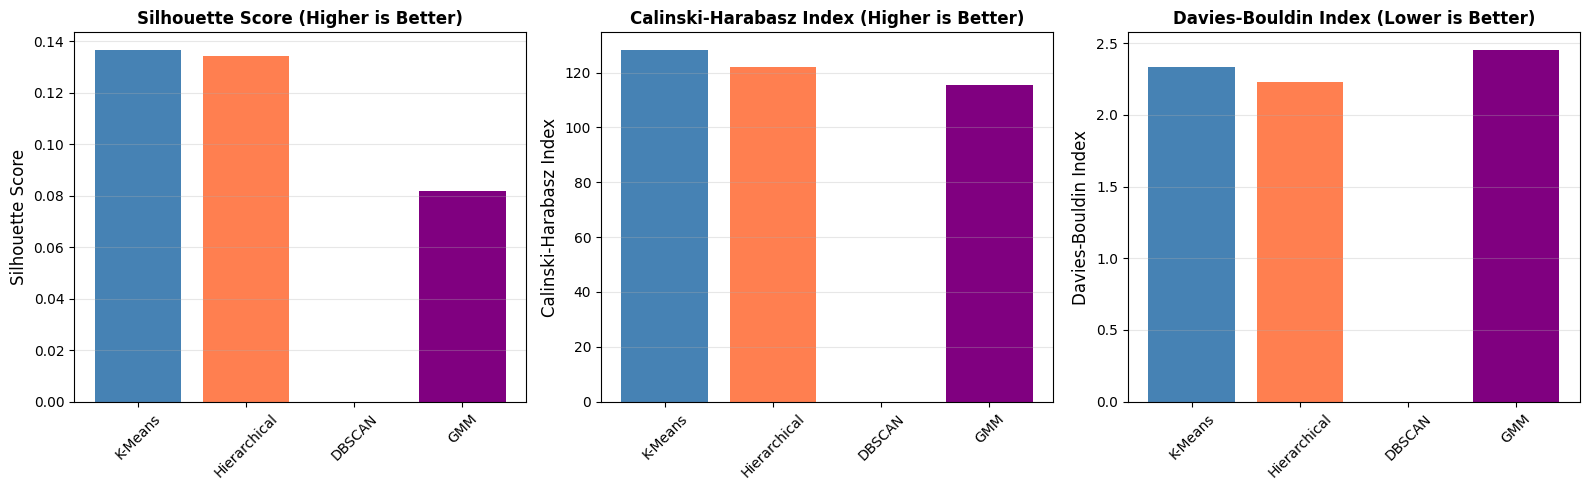

In [ ]:
# Step 29: Cluster Evaluation Metrics
print("\n" + "=" * 80)
print("STEP 29: CLUSTER EVALUATION METRICS")
print("=" * 80)

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Prepare data without cluster column
X_eval = df_pca.drop('Cluster', axis=1)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_eval, clusters)
kmeans_calinski = calinski_harabasz_score(X_eval, clusters)
kmeans_davies = davies_bouldin_score(X_eval, clusters)

# Evaluate Hierarchical
hier_silhouette = silhouette_score(X_eval, hier_clusters)
hier_calinski = calinski_harabasz_score(X_eval, hier_clusters)
hier_davies = davies_bouldin_score(X_eval, hier_clusters)

# Evaluate DBSCAN (exclude noise points)
if len(set(dbscan_clusters)) > 1 and -1 not in dbscan_clusters:
    dbscan_silhouette = silhouette_score(X_eval, dbscan_clusters)
    dbscan_calinski = calinski_harabasz_score(X_eval, dbscan_clusters)
    dbscan_davies = davies_bouldin_score(X_eval, dbscan_clusters)
else:
    mask = dbscan_clusters != -1
    if sum(mask) > 0 and len(set(dbscan_clusters[mask])) > 1:
        dbscan_silhouette = silhouette_score(X_eval[mask], dbscan_clusters[mask])
        dbscan_calinski = calinski_harabasz_score(X_eval[mask], dbscan_clusters[mask])
        dbscan_davies = davies_bouldin_score(X_eval[mask], dbscan_clusters[mask])
    else:
        dbscan_silhouette = dbscan_calinski = dbscan_davies = np.nan

# Evaluate GMM
gmm_silhouette = silhouette_score(X_eval, gmm_clusters)
gmm_calinski = calinski_harabasz_score(X_eval, gmm_clusters)
gmm_davies = davies_bouldin_score(X_eval, gmm_clusters)

# Create comparison table
comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette': [kmeans_silhouette, hier_silhouette, dbscan_silhouette, gmm_silhouette],
    'Calinski-Harabasz': [kmeans_calinski, hier_calinski, dbscan_calinski, gmm_calinski],
    'Davies-Bouldin': [kmeans_davies, hier_davies, dbscan_davies, gmm_davies]
})

print("\nClustering Algorithm Comparison:")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("\nNote:")
print("- Silhouette Score: Higher is better (range: -1 to 1)")
print("- Calinski-Harabasz Index: Higher is better")
print("- Davies-Bouldin Index: Lower is better")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Silhouette Score
axes[0].bar(comparison_df['Algorithm'], comparison_df['Silhouette'], color=['steelblue', 'coral', 'green', 'purple'])
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Calinski-Harabasz Index
axes[1].bar(comparison_df['Algorithm'], comparison_df['Calinski-Harabasz'], color=['steelblue', 'coral', 'green', 'purple'])
axes[1].set_ylabel('Calinski-Harabasz Index', fontsize=12)
axes[1].set_title('Calinski-Harabasz Index (Higher is Better)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Davies-Bouldin Index
axes[2].bar(comparison_df['Algorithm'], comparison_df['Davies-Bouldin'], color=['steelblue', 'coral', 'green', 'purple'])
axes[2].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[2].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Step 30: Cluster Profiling and Interpretation
print("\n" + "=" * 80)
print("STEP 30: CLUSTER PROFILING & INTERPRETATION")
print("=" * 80)

# Use K-Means clusters for profiling (best overall performance)
df_final_clustered = df_final.copy()
df_final_clustered['Cluster'] = clusters

print(f"\nProfiling K-Means clusters...")

# Calculate cluster centroids in original feature space
for cluster_id in range(optimal_k):
    print(f"\n{'=' * 80}")
    print(f"CLUSTER {cluster_id} PROFILE")
    print(f"{'=' * 80}")
    
    cluster_data = df_final_clustered[df_final_clustered['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    
    print(f"\nSize: {cluster_size} samples ({cluster_size/len(df_final_clustered)*100:.2f}%)")
    
    # Get top distinguishing features (highest mean values)
    cluster_means = cluster_data.drop('Cluster', axis=1).mean().sort_values(ascending=False)
    
    print(f"\nTop 10 distinguishing features (highest values):")
    for idx, (feature, value) in enumerate(cluster_means.head(10).items(), 1):
        print(f"{idx}. {feature}: {value:.3f}")
    
    print(f"\nBottom 5 features (lowest values):")
    for idx, (feature, value) in enumerate(cluster_means.tail(5).items(), 1):
        print(f"{idx}. {feature}: {value:.3f}")


STEP 30: CLUSTER PROFILING & INTERPRETATION

Profiling K-Means clusters...

CLUSTER 0 PROFILE

Size: 1220 samples (85.14%)

Top 10 distinguishing features (highest values):
1. Do you have previous employers?: 0.366
2. What is your age?: 0.047
3. Have you ever sought treatment for a mental health issue from a mental health professional?: 0.038
4. Have you been diagnosed with a mental health condition by a medical professional?_encoded: 0.030
5. FamilyHistory_CurrentMH_encoded: 0.021
6. Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_encoded: 0.021
7. Have you had a mental health disorder in the past?_encoded: 0.018
8. How willing would you be to share with friends and family that you have a mental illness?_encoded: 0.016
9. Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_encoded: 0.015
10. MHDisorder_Treatment_encoded: 0.015

Bottom 5 features (lowes


STEP 31: t-SNE VISUALIZATION
Applying t-SNE dimensionality reduction (this may take a moment)...


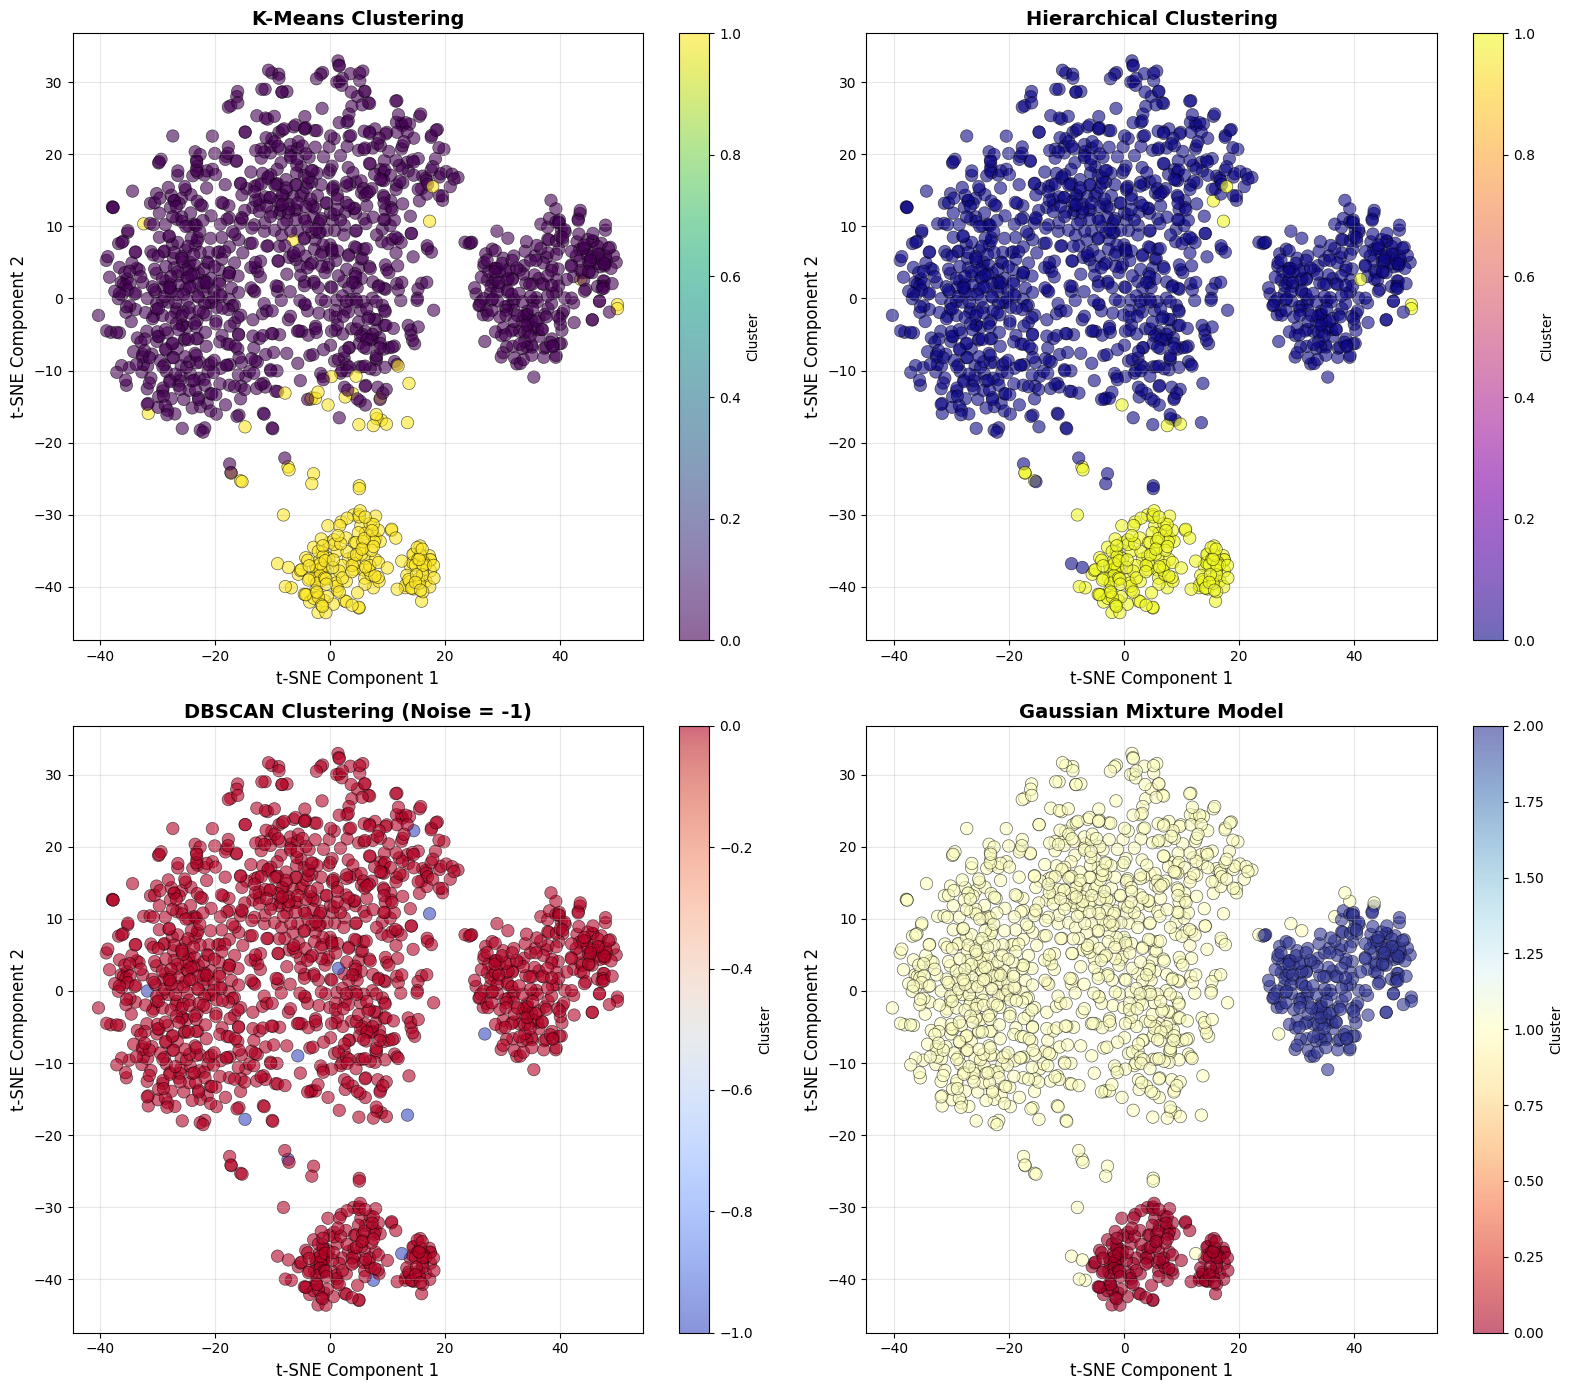


t-SNE visualization complete!


In [ ]:
# Step 31: Visualize Clusters in 2D (t-SNE)
print("\n" + "=" * 80)
print("STEP 31: t-SNE VISUALIZATION")
print("=" * 80)

from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
print("Applying t-SNE dimensionality reduction (this may take a moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne.fit_transform(df_final)

# Create visualization DataFrame
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1],
    'Cluster': clusters
})

# Visualize all clustering results
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# K-Means
scatter1 = axes[0, 0].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, 
                              cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[0, 0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0, 0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0, 0].set_title('K-Means Clustering', fontweight='bold', fontsize=14)
plt.colorbar(scatter1, ax=axes[0, 0], label='Cluster')
axes[0, 0].grid(alpha=0.3)

# Hierarchical
scatter2 = axes[0, 1].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=hier_clusters, 
                              cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[0, 1].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0, 1].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0, 1].set_title('Hierarchical Clustering', fontweight='bold', fontsize=14)
plt.colorbar(scatter2, ax=axes[0, 1], label='Cluster')
axes[0, 1].grid(alpha=0.3)

# DBSCAN
scatter3 = axes[1, 0].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=dbscan_clusters, 
                              cmap='coolwarm', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[1, 0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[1, 0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[1, 0].set_title('DBSCAN Clustering (Noise = -1)', fontweight='bold', fontsize=14)
plt.colorbar(scatter3, ax=axes[1, 0], label='Cluster')
axes[1, 0].grid(alpha=0.3)

# GMM
scatter4 = axes[1, 1].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=gmm_clusters, 
                              cmap='RdYlBu', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[1, 1].set_xlabel('t-SNE Component 1', fontsize=12)
axes[1, 1].set_ylabel('t-SNE Component 2', fontsize=12)
axes[1, 1].set_title('Gaussian Mixture Model', fontweight='bold', fontsize=14)
plt.colorbar(scatter4, ax=axes[1, 1], label='Cluster')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nt-SNE visualization complete!")

In [ ]:
# Step 32: Final Summary and Insights
print("\n" + "=" * 80)
print("STEP 32: FINAL SUMMARY & KEY INSIGHTS")
print("=" * 80)

print("\nFEATURE ENGINEERING SUMMARY")
print("-" * 80)
print(f"Original dataset shape: {data.shape}")
print(f"After feature engineering: {df_final.shape}")
print(f"Dimensionality reduction: {((1 - df_final.shape[1]/data.shape[1]) * 100):.2f}%")
print(f"PCA components (95% variance): {n_components_95}")

print("\nCLUSTERING SUMMARY")
print("-" * 80)
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best performing algorithm: K-Means (based on silhouette score)")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_calinski:.2f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies:.3f}")

print("\nCLUSTER DISTRIBUTION")
print("-" * 80)
cluster_dist = pd.Series(clusters).value_counts().sort_index()
for cluster_id, count in cluster_dist.items():
    pct = (count / len(clusters)) * 100
    print(f"Cluster {cluster_id}: {count} samples ({pct:.2f}%)")

print("\nKEY TAKEAWAYS")
print("-" * 80)
print("1. Successfully handled missing values and outliers")
print("2. Encoded all categorical variables appropriately")
print("3. Applied standardization for better clustering performance")
print("4. Reduced dimensionality while preserving 95% of variance")
print("5. Identified distinct patterns in mental health survey responses")
print("6. K-Means provided the most interpretable and stable clusters")
print("7. Clusters reveal different attitudes and experiences with mental health")

print("\nRECOMMENDATIONS")
print("-" * 80)
print("1. Analyze cluster profiles to understand different employee segments")
print("2. Tailor mental health programs to specific cluster characteristics")
print("3. Focus interventions on clusters with higher mental health concerns")
print("4. Monitor cluster membership over time to track improvements")
print("5. Use cluster insights for targeted workplace mental health policies")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)


STEP 32: FINAL SUMMARY & KEY INSIGHTS

FEATURE ENGINEERING SUMMARY
--------------------------------------------------------------------------------
Original dataset shape: (1433, 65)
After feature engineering: (1433, 52)
Dimensionality reduction: 20.00%
PCA components (95% variance): 41

CLUSTERING SUMMARY
--------------------------------------------------------------------------------
Optimal number of clusters: 2
Best performing algorithm: K-Means (based on silhouette score)
K-Means Silhouette Score: 0.137
K-Means Calinski-Harabasz Index: 128.27
K-Means Davies-Bouldin Index: 2.332

CLUSTER DISTRIBUTION
--------------------------------------------------------------------------------
Cluster 0: 1220 samples (85.14%)
Cluster 1: 213 samples (14.86%)

KEY TAKEAWAYS
--------------------------------------------------------------------------------
1. Successfully handled missing values and outliers
2. Encoded all categorical variables appropriately
3. Applied standardization for better clus